In [528]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy import stats


# Import DataFrames

In [529]:
df_indicateurmacro = pd.read_csv('data/indicateursmacro.csv', sep=',') #Source : FAO
df_population_series_temporelles = pd.read_csv('data/population_series_temporelles.csv', sep=',') #Source : FAO
df_menages = pd.read_csv('data/menages.csv', sep=',') #Source : FAO
df_geo = pd.read_csv('data/countrylatlong.csv') # https://developers.google.com/public-data/docs/canonical/countries_csv

In [530]:
df_cereales = pd.read_csv('newdata/fao_dispoali_cereales_2019.csv', sep = ',') #Source : FAO
df_fruits = pd.read_csv('newdata/fao_dispoali_fruits_2019.csv', sep = ',') #Source : FAO
df_legumes = pd.read_csv('newdata/fao_dispoali_legumes_2019.csv', sep = ',') #Source : FAO
df_poisson = pd.read_csv('newdata/fao_dispoali_poisson_2019.csv', sep = ',') #Source : FAO
df_viande = pd.read_csv('newdata/fao_dispoali_viandes_2019.csv', sep = ',') #Source : FAO
df_sa_acces = pd.read_csv('newdata/fao_secuali_acces.csv', sep = ',')   #Source : FAO
df_sa_disponibilite = pd.read_csv('newdata/fao_secuali_disponibilite.csv', sep = ',') #Source : FAO
df_sa_indicateursvedette = pd.read_csv('newdata/fao_secuali_indicateursvedettes.csv', sep = ',') #Source : FAO
df_sa_stabilite = pd.read_csv('newdata/fao_secuali_stabilité.csv', sep = ',') #Source : FAO
df_sa_utilisation = pd.read_csv('newdata/fao_secuali_utilisation.csv', sep = ',') #Source : FAO
df_sa = pd.read_csv('newdata/fao_secuali.csv', sep = ',') #Source : FAO

In [531]:
df_agricultural_land = pd.read_csv('newdata/agricultural_land.csv', sep = ',') #Source : WorldBand
df_co2 = pd.read_csv('newdata/co2.csv', sep = ',') #Source : WorldBand
df_density = pd.read_csv('newdata/density.csv', sep = ',') #Source : WorldBand
df_container_port_traffic = pd.read_csv('newdata/container_port_traffic.csv', sep = ',') #Source : WorldBand
df_import = pd.read_csv('newdata/imports.csv', sep = ',') #Source : WorldBand
df_export = pd.read_csv('newdata/export.csv', sep = ',') #Source : WorldBand
df_inflation = pd.read_csv('newdata/inflation.csv', sep = ',') #Source : WorldBand
df_rail_lines = pd.read_csv('newdata/rail_lines.csv', sep = ',') #Source : WorldBand

In [532]:
wid_df = pd.read_csv('newdata/WID_Data.csv', sep=';') #Source : World Inequality Database

## Disponibilite Alimentaire / Production

Le but ici est de nettoyer les données et de les mettre dans un format exploitable pour la suite. 
Comme nous travaillons sur la volaille nous allons nous concentré sur les données concernant la volaille, le blé et le mais (le blé et le mais étant la principal source d'alimentation des volailles).

In [533]:
df_viande.head(3)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5511,Production,F2731,Viande de Bovins,2019,2019,Milliers de tonnes,424.0,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5611,Importations - Quantité,F2731,Viande de Bovins,2019,2019,Milliers de tonnes,501.0,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5072,Variation de stock,F2731,Viande de Bovins,2019,2019,Milliers de tonnes,12.0,I,Valeur imputée


In [534]:
df_volailles = df_viande[df_viande['Produit'].str.contains('Volailles')]

In [535]:
df_ble = df_cereales[df_cereales['Produit'].str.contains('Blé')]
df_mais = df_cereales[df_cereales['Produit'].str.contains('Maïs')]

In [536]:
def pivot_dispoali(df, produit):
    df = pd.pivot_table(df, index = ['Zone'], columns = ['Élément'], values = ['Valeur'], aggfunc = np.sum)
    df.columns = df.columns.droplevel(0)
    df = df.rename_axis(None, axis = 1)
    df = df.reset_index()
    for el in df.columns:
        # Ajout de l'unité aux colonnes
        if el != 'Zone' and el != 'Disponibilité alimentaire (Kcal/personne/jour)':
            df = df.rename(columns={el: el + ' (Milliers de tonnes)'})
    # ajout du type de produit aux colonnes
    for el in df.columns:
        if el != 'Zone':
            df = df.rename(columns={el: produit + ' - ' + el})
    return df

In [537]:
df_ble = pivot_dispoali(df_ble, 'Blé')
df_mais = pivot_dispoali(df_mais, 'Maïs')
df_volailles = pivot_dispoali(df_volailles, 'Volailles')

In [538]:
df_volailles.head(3)

,Zone,Volailles - Disponibilité alimentaire (Kcal/personne/jour),Volailles - Disponibilité intérieure (Milliers de tonnes),Volailles - Exportations - Quantité (Milliers de tonnes),Volailles - Importations - Quantité (Milliers de tonnes),Volailles - Nourriture (Milliers de tonnes),Volailles - Pertes (Milliers de tonnes),Volailles - Production (Milliers de tonnes),Volailles - Variation de stock (Milliers de tonnes)
0,Afghanistan,6.29,69.0,NaN,44.0,69.0,NaN,28.0,3.0
1,Afrique du Sud,149.63,2178.0,48.0,488.0,2178.0,NaN,1816.0,77.0
2,Albanie,62.33,35.0,0.0,22.0,35.0,NaN,13.0,0.0


In [539]:
df_ble.head(3)

,Zone,Blé - Aliments pour animaux (Milliers de tonnes),Blé - Disponibilité alimentaire (Kcal/personne/jour),Blé - Disponibilité intérieure (Milliers de tonnes),Blé - Exportations - Quantité (Milliers de tonnes),Blé - Importations - Quantité (Milliers de tonnes),Blé - Nourriture (Milliers de tonnes),Blé - Pertes (Milliers de tonnes),Blé - Production (Milliers de tonnes),Blé - Semences (Milliers de tonnes),Blé - Variation de stock (Milliers de tonnes)
0,Afghanistan,0.0,1361.66,6996.0,0.0,2534.0,6047.0,733.0,4890.0,376.0,428.0
1,Afrique du Sud,23.0,473.43,3581.0,307.0,2009.0,3387.0,79.0,1597.0,20.0,-283.0
2,Albanie,29.0,968.51,544.0,4.0,308.0,359.0,29.0,233.0,10.0,-7.0


In [540]:
df_mais.head(3)

,Zone,Maïs - Aliments pour animaux (Milliers de tonnes),Maïs - Disponibilité alimentaire (Kcal/personne/jour),Maïs - Disponibilité intérieure (Milliers de tonnes),Maïs - Exportations - Quantité (Milliers de tonnes),Maïs - Importations - Quantité (Milliers de tonnes),Maïs - Nourriture (Milliers de tonnes),Maïs - Pertes (Milliers de tonnes),Maïs - Production (Milliers de tonnes),Maïs - Semences (Milliers de tonnes),Maïs - Variation de stock (Milliers de tonnes)
0,Afghanistan,118.0,29.86,302.0,0.0,131.0,134.0,28.0,185.0,15.0,14.0
1,Afrique du Sud,5698.0,756.69,11166.0,1657.0,609.0,4883.0,506.0,11276.0,32.0,-939.0
2,Albanie,420.0,19.41,482.0,0.0,99.0,7.0,46.0,389.0,3.0,6.0


In [541]:
df_volailles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Zone                                                        186 non-null    object 
 1   Volailles - Disponibilité alimentaire (Kcal/personne/jour)  186 non-null    float64
 2   Volailles - Disponibilité intérieure (Milliers de tonnes)   186 non-null    float64
 3   Volailles - Exportations - Quantité (Milliers de tonnes)    144 non-null    float64
 4   Volailles - Importations - Quantité (Milliers de tonnes)    186 non-null    float64
 5   Volailles - Nourriture (Milliers de tonnes)                 186 non-null    float64
 6   Volailles - Pertes (Milliers de tonnes)                     120 non-null    float64
 7   Volailles - Production (Milliers de tonnes)                 184 non-null    float64
 8   V

In [542]:
df_ble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Zone                                                  186 non-null    object 
 1   Blé - Aliments pour animaux (Milliers de tonnes)      177 non-null    float64
 2   Blé - Disponibilité alimentaire (Kcal/personne/jour)  186 non-null    float64
 3   Blé - Disponibilité intérieure (Milliers de tonnes)   186 non-null    float64
 4   Blé - Exportations - Quantité (Milliers de tonnes)    174 non-null    float64
 5   Blé - Importations - Quantité (Milliers de tonnes)    186 non-null    float64
 6   Blé - Nourriture (Milliers de tonnes)                 186 non-null    float64
 7   Blé - Pertes (Milliers de tonnes)                     148 non-null    float64
 8   Blé - Production (Milliers de tonnes)                 175 no

In [543]:
df_mais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Zone                                                   186 non-null    object 
 1   Maïs - Aliments pour animaux (Milliers de tonnes)      185 non-null    float64
 2   Maïs - Disponibilité alimentaire (Kcal/personne/jour)  181 non-null    float64
 3   Maïs - Disponibilité intérieure (Milliers de tonnes)   186 non-null    float64
 4   Maïs - Exportations - Quantité (Milliers de tonnes)    151 non-null    float64
 5   Maïs - Importations - Quantité (Milliers de tonnes)    186 non-null    float64
 6   Maïs - Nourriture (Milliers de tonnes)                 182 non-null    float64
 7   Maïs - Pertes (Milliers de tonnes)                     171 non-null    float64
 8   Maïs - Production (Milliers de tonnes)            

## Securité Alimentaire

In [544]:
products = df_sa['Produit'].unique().tolist()
products

["Taux de dépendance à l'égard des importations céréalières (%) (moyenne sur 3 ans)",
 "Pourcentage des terres arables aménagées pour l'irrigation (%) (moyenne sur 3 ans)",
 'Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)']

In [545]:
pd.pivot_table(df_sa, index = ['Zone','Produit'], columns = ['Élément'], values = ['Valeur'], aggfunc = np.sum)

Valeur
Élément                                                           Valeur
Zone           Produit                                                  
Afghanistan    Pourcentage des terres arables aménagées pour l...    0.0
               Taux de dépendance à l'égard des importations c...    0.0
               Valeur des importations alimentaires par rappor...  281.0
Afrique du Sud Pourcentage des terres arables aménagées pour l...    0.0
               Taux de dépendance à l'égard des importations c...    0.0
...                                                                  ...
Îles Marshall  Taux de dépendance à l'égard des importations c...    0.0
               Valeur des importations alimentaires par rappor...    0.0
Îles Salomon   Pourcentage des terres arables aménagées pour l...    0.0
               Taux de dépendance à l'égard des importations c...    0.0
               Valeur des importations alimentaires par rappor...   24.0

[612 rows x 1 columns]

In [546]:
def pivot_secuali(df,products):
    df = df[df['Produit'].isin(products)]
    df = df[df['Élément'] == 'Valeur']
    df = pd.pivot_table(df, index = ['Zone','Produit'], columns = ['Description du Symbole'], values = ['Valeur'], aggfunc = np.sum)
    #df = df.stack().unstack(1).droplevel(0, axis = 1).reset_index()
    return df

In [547]:
df_sa_acces['Produit'].unique()

array(['PIB par habitant, ($ PPA internationaux constants de 2017)',
       'Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)',
       'Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
       'Prévalence de l’insécurité alimentaire grave – population totale (%) (moyenne sur 3 ans)',
       'Prévalence de l’insécurité alimentaire grave – hommes adultes (%) (moyenne sur 3 ans)',
       'Prévalence de l’insécurité alimentaire grave – femmes adultes (%) (moyenne sur 3 ans)',
       'Prévalence de l’insécurité alimentaire modérée ou grave – population totale (%) (moyenne sur 3 ans)',
       'Prévalence de l’insécurité alimentaire modérée ou grave – hommes adultes (%) (moyenne sur 3 ans)',
       'Prévalence de l’insécurité alimentaire modérée ou grave – femmes adultes (%) (moyenne sur 3 ans)',
       'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)',
       'Nombre de femmes adultes en situation d’insécurité alimen

In [548]:
products = [
    'Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)',
    'Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
    'Prévalence de l’insécurité alimentaire grave – population totale (%) (moyenne sur 3 ans)',
    'Prévalence de l’insécurité alimentaire modérée ou grave – population totale (%) (moyenne sur 3 ans)',
    'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)',
    'Nombre de personnes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)',
]
pivot_secuali(df_sa_acces, products)

Valeur  \
Description du Symbole                                          Chiffre officiel   
Zone         Produit                                                               
Afghanistan  Nombre de personnes en situation d’insécurité a...              7.5   
             Nombre de personnes en situation d’insécurité a...               24   
             Nombre de personnes sous-alimentées (millions) ...              NaN   
             Prévalence de la sous-alimentation (%) (moyenne...              NaN   
             Prévalence de l’insécurité alimentaire grave – ...             19.8   
...                                                                          ...   
Îles Salomon Nombre de personnes en situation d’insécurité a...              NaN   
             Nombre de personnes sous-alimentées (millions) ...              NaN   
             Prévalence de la sous-alimentation (%) (moyenne...              NaN   
             Prévalence de l’insécurité alimentaire grave – ...              NaN   
             Prévalence de l’insécurité alimentaire modérée ...              NaN   

                                                                                \
Description du Symbole                                          Valeur estimée   
Zone         Produit                                                             
Afghanistan  Nombre de personnes en situation d’insécurité a...            2.4   
             Nombre de personnes en situation d’insécurité a...            NaN   
             Nombre de personnes sous-alimentées (millions) ...           10.2   
             Prévalence de la sous-alimentation (%) (moyenne...           26.9   
             Prévalence de l’insécurité alimentaire grave – ...            NaN   
...                                                                        ...   
Îles Salomon Nombre de personnes en situation d’insécurité a...            NaN   
             Nombre de personnes sous-alimentées (millions) ...            0.1   
             Prévalence de la sous-alimentation (%) (moyenne...           17.8   
             Prévalence de l’insécurité alimentaire grave – ...            NaN   
             Prévalence de l’insécurité alimentaire modérée ...            NaN   

                                                                                  
Description du Symbole                                          Valeur manquante  
Zone         Produit                                                              
Afghanistan  Nombre de personnes en situation d’insécurité a...              NaN  
             Nombre de personnes en situation d’insécurité a...              NaN  
             Nombre de personnes sous-alimentées (millions) ...              NaN  
             Prévalence de la sous-alimentation (%) (moyenne...              NaN  
             Prévalence de l’insécurité alimentaire grave – ...              NaN  
...                                                                          ...  
Îles Salomon Nombre de personnes en situation d’insécurité a...                0  
             Nombre de personnes sous-alimentées (millions) ...              NaN  
             Prévalence de la sous-alimentation (%) (moyenne...              NaN  
             Prévalence de l’insécurité alimentaire grave – ...                0  
             Prévalence de l’insécurité alimentaire modérée ...                0  

[1224 rows x 3 columns]

In [549]:
df_sa_disponibilite['Produit'].unique().tolist()

['Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)',
 "Disponibilité alimentaire par habitant utilisée dans l'estimation de la prévalence de la sous-alimentation (kcal/personne/jour) (moyenne sur 3 ans)",
 'Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)',
 'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
 'Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)']

In [550]:
 df_sa_disponibilite = pivot_secuali(df_sa_disponibilite, df_sa_disponibilite['Produit'].unique().tolist())

In [551]:
df_sa_disponibilite

Valeur  \
Description du Symbole                                          Valeur estimée   
Zone         Produit                                                             
Afghanistan  Disponibilité alimentaire par habitant utilisée...         2247.0   
             Disponibilités protéines moyennes d’origine ani...            NaN   
             Disponibilités protéiques moyennes (g/personne/...            NaN   
             Part des céréales, des racines et des tubercule...            NaN   
             Suffisance des apports énergétiques alimentaire...          105.0   
...                                                                        ...   
Îles Salomon Disponibilité alimentaire par habitant utilisée...         2404.0   
             Disponibilités protéines moyennes d’origine ani...            NaN   
             Disponibilités protéiques moyennes (g/personne/...            NaN   
             Part des céréales, des racines et des tubercule...            NaN   
             Suffisance des apports énergétiques alimentaire...          111.0   

                                                                                  
Description du Symbole                                          Valeur manquante  
Zone         Produit                                                              
Afghanistan  Disponibilité alimentaire par habitant utilisée...              NaN  
             Disponibilités protéines moyennes d’origine ani...              0.0  
             Disponibilités protéiques moyennes (g/personne/...              0.0  
             Part des céréales, des racines et des tubercule...              0.0  
             Suffisance des apports énergétiques alimentaire...              NaN  
...                                                                          ...  
Îles Salomon Disponibilité alimentaire par habitant utilisée...              NaN  
             Disponibilités protéines moyennes d’origine ani...              0.0  
             Disponibilités protéiques moyennes (g/personne/...              0.0  
             Part des céréales, des racines et des tubercule...              0.0  
             Suffisance des apports énergétiques alimentaire...              NaN  

[1020 rows x 2 columns]

In [552]:
df_sa_indicateursvedette['Produit'].unique().tolist()

['Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)',
 'Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
 'Prévalence de l’insécurité alimentaire grave – population totale (%) (moyenne sur 3 ans)',
 'Prévalence de l’insécurité alimentaire grave – hommes adultes (%) (moyenne sur 3 ans)',
 'Prévalence de l’insécurité alimentaire grave – femmes adultes (%) (moyenne sur 3 ans)',
 'Prévalence de l’insécurité alimentaire modérée ou grave – population totale (%) (moyenne sur 3 ans)',
 'Prévalence de l’insécurité alimentaire modérée ou grave – hommes adultes (%) (moyenne sur 3 ans)',
 'Prévalence de l’insécurité alimentaire modérée ou grave – femmes adultes (%) (moyenne sur 3 ans)',
 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)',
 'Nombre de femmes adultes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)',
 'Nombre de personnes en situation d’insécurité alimentaire modérée ou grave (millio

In [553]:
products = [
    'Pourcentage des enfants de moins de 5 ans présentant un retard de croissance (estimation modélisée) (%)',
    "Nombre d'enfants de moins de 5 ans présentant un retard de croissance (estimation modélisée) (millions)",
    "Prévalence de l'excès pondéral chez l’enfant de moins de 5 ans (estimation modélisée) (%)",
    "Nombre d'enfants de moins de 5 ans présentant un excès pondéral (estimation modélisée) (millions)",
    "Prévalence de l'allaitement exclusif au sein du nourrisson de 0 à 5 mois",
    'Pourcentage des enfants de moins de 5 ans émaciés (%)',
    "Nombre d'enfants de moins de 5 ans émaciés (millions)",
]
df_sa_enfants = pivot_secuali(df_sa_indicateursvedette, products)
df_sa_enfants.head()

Valeur
Description du Symbole                                            Ciffre de sources internationales
Zone           Produit                                                                             
Afghanistan    Nombre d'enfants de moins de 5 ans présentant u...                               0.2
               Nombre d'enfants de moins de 5 ans présentant u...                                 2
               Pourcentage des enfants de moins de 5 ans prése...                              36.3
               Prévalence de l'excès pondéral chez l’enfant de...                               4.1
Afrique du Sud Nombre d'enfants de moins de 5 ans présentant u...                               0.7

In [554]:
df_sa_stabilite['Produit'].unique().tolist()

["Taux de dépendance à l'égard des importations céréalières (%) (moyenne sur 3 ans)",
 "Pourcentage des terres arables aménagées pour l'irrigation (%) (moyenne sur 3 ans)",
 'Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)',
 'Stabilité politique et absence de violence/terrorisme (indice)',
 'Variabilité de la production alimentaire par habitant ($I par personne constant 2014-16)',
 'Variabilité des disponibilités alimentaires par habitant (Kcal/personne/jour)']

In [555]:
df_sa_stabilite = pivot_secuali(df_sa_stabilite, df_sa_stabilite['Produit'].tolist())
df_sa_stabilite 

Valeur  \
Description du Symbole                                          Ciffre de sources internationales   
Zone         Produit                                                                                
Afghanistan  Pourcentage des terres arables aménagées pour l...                               NaN   
             Stabilité politique et absence de violence/terr...                             -2.66   
             Taux de dépendance à l'égard des importations c...                               NaN   
             Valeur des importations alimentaires par rappor...                               NaN   
             Variabilité de la production alimentaire par ha...                               NaN   
...                                                                                           ...   
Îles Salomon Stabilité politique et absence de violence/terr...                              0.51   
             Taux de dépendance à l'égard des importations c...                               NaN   
             Valeur des importations alimentaires par rappor...                               NaN   
             Variabilité de la production alimentaire par ha...                               NaN   
             Variabilité des disponibilités alimentaires par...                               NaN   

                                                                                \
Description du Symbole                                          Valeur estimée   
Zone         Produit                                                             
Afghanistan  Pourcentage des terres arables aménagées pour l...            NaN   
             Stabilité politique et absence de violence/terr...            NaN   
             Taux de dépendance à l'égard des importations c...            NaN   
             Valeur des importations alimentaires par rappor...          281.0   
             Variabilité de la production alimentaire par ha...            7.8   
...                                                                        ...   
Îles Salomon Stabilité politique et absence de violence/terr...            NaN   
             Taux de dépendance à l'égard des importations c...            NaN   
             Valeur des importations alimentaires par rappor...           24.0   
             Variabilité de la production alimentaire par ha...            6.2   
             Variabilité des disponibilités alimentaires par...           23.0   

                                                                                  
Description du Symbole                                          Valeur manquante  
Zone         Produit                                                              
Afghanistan  Pourcentage des terres arables aménagées pour l...              0.0  
             Stabilité politique et absence de violence/terr...              NaN  
             Taux de dépendance à l'égard des importations c...              0.0  
             Valeur des importations alimentaires par rappor...              NaN  
             Variabilité de la production alimentaire par ha...              NaN  
...                                                                          ...  
Îles Salomon Stabilité politique et absence de violence/terr...              NaN  
             Taux de dépendance à l'égard des importations c...              0.0  
             Valeur des importations alimentaires par rappor...              NaN  
             Variabilité de la production alimentaire par ha...              NaN  
             Variabilité des disponibilités alimentaires par...              NaN  

[1219 rows x 3 columns]

In [556]:
df_sa_utilisation['Produit'].unique().tolist()

["Pourcentage de la population ayant accès à des services d'eau potable gérés en toute sécurité",
 "Pourcentage de la population utilisant au moins les services d'eau de base",
 "Pourcentage de la population utilisant au moins les services d'assainissement de base",
 'Pourcentage des enfants de moins de 5 ans présentant un retard de croissance (estimation modélisée) (%)',
 "Prévalence de l'excès pondéral chez l’enfant de moins de 5 ans (estimation modélisée) (%)",
 "Prévalence de l'anémie chez la femme en âge de procréer (15-49 ans)",
 "Prévalence de l'allaitement exclusif au sein du nourrisson de 0 à 5 mois",
 "Pourcentage de la population ayant accès à des services d'assainissement gérés en toute sécurité",
 'Pourcentage des enfants de moins de 5 ans émaciés (%)']

In [557]:
products = [
    "Pourcentage de la population ayant accès à des services d'eau potable gérés en toute sécurité",
    "Pourcentage de la population utilisant au moins les services d'eau de base",
    "Pourcentage de la population utilisant au moins les services d'assainissement de base",
    "Pourcentage de la population ayant accès à des services d'assainissement gérés en toute sécurité",
]
df_sa_eau = pivot_secuali(df_sa_utilisation, products)
df_sa_eau.head()

Valeur
Description du Symbole                                            Ciffre de sources internationales
Zone           Produit                                                                             
Afghanistan    Pourcentage de la population ayant accès à des ...                              26.8
               Pourcentage de la population utilisant au moins...                              49.0
               Pourcentage de la population utilisant au moins...                              72.4
Afrique du Sud Pourcentage de la population utilisant au moins...                              77.6
               Pourcentage de la population utilisant au moins...                              93.5

In [558]:
df_sa_eau = df_sa_utilisation[df_sa_utilisation['Produit'].isin(products)]
df_sa_eau

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6121,Valeur,21045,Pourcentage de la population ayant accès à des...,2019,2019,%,26.8,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6121,Valeur,21047,Pourcentage de la population utilisant au moin...,2019,2019,%,72.4,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6121,Valeur,21048,Pourcentage de la population utilisant au moin...,2019,2019,%,49.0,X,Ciffre de sources internationales,NaN
7,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6121,Valeur,21047,Pourcentage de la population utilisant au moin...,2019,2019,%,93.5,X,Ciffre de sources internationales,NaN
8,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6121,Valeur,21048,Pourcentage de la population utilisant au moin...,2019,2019,%,77.6,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,FS,Données de la sécurité alimentaire,894,Zambie,6121,Valeur,21048,Pourcentage de la population utilisant au moin...,2019,2019,%,31.5,X,Ciffre de sources internationales,NaN
1343,FS,Données de la sécurité alimentaire,716,Zimbabwe,6121,Valeur,21045,Pourcentage de la population ayant accès à des...,2019,2019,%,29.7,X,Ciffre de sources internationales,NaN
1344,FS,Données de la sécurité alimentaire,716,Zimbabwe,6121,Valeur,21047,Pourcentage de la population utilisant au moin...,2019,2019,%,63.1,X,Ciffre de sources internationales,NaN
1345,FS,Données de la sécurité alimentaire,716,Zimbabwe,6121,Valeur,21046,Pourcentage de la population ayant accès à des...,2019,2019,%,26.0,X,Ciffre de sources internationales,NaN


In [559]:
df_sa_eau = pd.pivot_table(df_sa_eau, index = ['Zone'], columns = ['Produit'], values = ['Valeur'], aggfunc = np.sum)

In [560]:
df_secuali = pd.merge(df_sa_acces, df_sa_disponibilite, on = 'Zone', how = 'outer')
df_secuali = pd.merge(df_secuali, df_sa_enfants, on = 'Zone', how = 'outer')
df_secuali = pd.merge(df_secuali, df_sa_stabilite, on = 'Zone', how = 'outer')
df_secuali = pd.merge(df_secuali, df_sa_eau, on = 'Zone', how = 'outer')
df_secuali.dropna(how='any', axis=1 ,inplace=True)
df_secuali


/tmp/ipykernel_2118021/3783389687.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_secuali = pd.merge(df_sa_acces, df_sa_disponibilite, on = 'Zone', how = 'outer')
/tmp/ipykernel_2118021/3783389687.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_secuali = pd.merge(df_secuali, df_sa_enfants, on = 'Zone', how = 'outer')
/tmp/ipykernel_2118021/3783389687.py:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_secuali = pd.merge(df_secuali, df_sa_stabilite, on = 'Zone', how = 'outer')
/tmp/ipykernel_2118021/3783389687.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_secuali = pd.merge(df

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Symbole,Description du Symbole
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,X,Ciffre de sources internationales
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,X,Ciffre de sources internationales
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,X,Ciffre de sources internationales
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,X,Ciffre de sources internationales
4,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,X,Ciffre de sources internationales
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876135,FS,Données de la sécurité alimentaire,716,Zimbabwe,61322,Confidence interval: Upper bound,210081F,Nombre de femmes adultes en situation d’insécu...,20182020,2018-2020,millions,E,Valeur estimée
876136,FS,Données de la sécurité alimentaire,716,Zimbabwe,61322,Confidence interval: Upper bound,210081F,Nombre de femmes adultes en situation d’insécu...,20182020,2018-2020,millions,E,Valeur estimée
876137,FS,Données de la sécurité alimentaire,716,Zimbabwe,61322,Confidence interval: Upper bound,210081F,Nombre de femmes adultes en situation d’insécu...,20182020,2018-2020,millions,E,Valeur estimée
876138,FS,Données de la sécurité alimentaire,716,Zimbabwe,61322,Confidence interval: Upper bound,210081F,Nombre de femmes adultes en situation d’insécu...,20182020,2018-2020,millions,E,Valeur estimée


## Indicateurs Macro
Le but ici est de récupérer un jeu de donnée exploitable en ce qui concerne le PIB

In [561]:
df_indicateurmacro.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2000,2000,millions,3342.034168,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2000,2000,US$,160.829727,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2000,2000,%,54.924825,E,Valeur estimée,NaN
3,MK,Indicateurs macro,4,Afghanistan,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2000,2000,%,50.383616,E,Valeur estimée,NaN
4,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2001,2001,millions,3598.470576,X,Ciffre de sources internationales,NaN


In [562]:
df_indicateurmacro['Produit'].unique()

array(['Produit Intérieur Brut',
       'Valeur ajoutée (agriculture, sylviculture et pêche)',
       'Valeur ajoutée (Fabrication de produits alimentaires, boissons et de produits à base de tabac)',
       'Valeur ajoutée (Fabrication de produits alimentaires et boissons)',
       'Valeur ajoutée (Fabrication de produits à base de tabac)'],
      dtype=object)

In [563]:
df_pivot_indicateursmacro = pd.pivot_table(df_indicateurmacro,index=['Zone','Produit','Année'], columns='Élément', values='Valeur',aggfunc=np.sum)

In [564]:
df_pivot_indicateursmacro.head(10)

Élément                                   Croissance annuelle US$  \
Zone        Produit                Année                            
Afghanistan Produit Intérieur Brut 2000                 54.924825   
                                   2001                  7.673064   
                                   2002                 15.091227   
                                   2003                 14.186040   
                                   2004                 13.944471   
                                   2005                 15.442049   
                                   2006                 14.213114   
                                   2007                 32.477749   
                                   2008                  8.762491   
                                   2009                 13.267998   

Élément                                   Croissance annuelle US$ par habitant  \
Zone        Produit                Année                                         
Afghanistan Produit Intérieur Brut 2000                              50.383616   
                                   2001                               3.551740   
                                   2002                              10.030533   
                                   2003                               8.977935   
                                   2004                               9.125200   
                                   2005                              11.267960   
                                   2006                              10.848161   
                                   2007                              29.214818   
                                   2008                               6.323226   
                                   2009                              10.585222   

Élément                                   Part du PIB US $  \
Zone        Produit                Année                     
Afghanistan Produit Intérieur Brut 2000                NaN   
                                   2001                NaN   
                                   2002                NaN   
                                   2003                NaN   
                                   2004                NaN   
                                   2005                NaN   
                                   2006                NaN   
                                   2007                NaN   
                                   2008                NaN   
                                   2009                NaN   

Élément                                   Part du valeur ajoutée (industrie manufacturière) US $  \
Zone        Produit                Année                                                           
Afghanistan Produit Intérieur Brut 2000                                                 NaN        
                                   2001                                                 NaN        
                                   2002                                                 NaN        
                                   2003                                                 NaN        
                                   2004                                                 NaN        
                                   2005                                                 NaN        
                                   2006                                                 NaN        
                                   2007                                                 NaN        
                                   2008                                                 NaN        
                                   2009                                                 NaN        

Élément                                   Ratio du valeur ajoutée (Agriculture, Sylviculture et Pêche) US $  \
Zone        Produit                Année                                                                      
Afghanistan Produi

In [565]:
df_pivot_indicateursmacro_2019 = df_pivot_indicateursmacro.loc[df_pivot_indicateursmacro.index.get_level_values('Année') == 2019]
df_pivot_indicateursmacro_2019

Élément                                                                             Croissance annuelle US$  \
Zone                      Produit                                            Année                            
Afghanistan               Produit Intérieur Brut                             2019                  2.636658   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019                 20.009373   
Afrique du Sud            Produit Intérieur Brut                             2019                 -4.526818   
                          Valeur ajoutée (Fabrication de produits aliment... 2019                 -4.320797   
                          Valeur ajoutée (Fabrication de produits aliment... 2019                 -4.320797   
...                                                                                                     ...   
Îles Salomon              Valeur ajoutée (agriculture, sylviculture et pê... 2019                  2.264663   
Îles Turques-et-Caïques   Produit Intérieur Brut                             2019                  7.567253   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019                 -0.827396   
Îles Vierges britanniques Produit Intérieur Brut                             2019                  4.122884   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019                  9.046047   

Élément                                                                             Croissance annuelle US$ par habitant  \
Zone                      Produit                                            Année                                         
Afghanistan               Produit Intérieur Brut                             2019                               0.289848   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019                                    NaN   
Afrique du Sud            Produit Intérieur Brut                             2019                              -5.775297   
                          Valeur ajoutée (Fabrication de produits aliment... 2019                                    NaN   
                          Valeur ajoutée (Fabrication de produits aliment... 2019                                    NaN   
...                                                                                                                  ...   
Îles Salomon              Valeur ajoutée (agriculture, sylviculture et pê... 2019                                    NaN   
Îles Turques-et-Caïques   Produit Intérieur Brut                             2019                               6.085743   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019                                    NaN   
Îles Vierges britanniques Produit Intérieur Brut                             2019                               3.332340   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019                                    NaN   

Élément                                                                             Part du PIB US $  \
Zone                      Produit                                            Année                     
Afghanistan               Produit Intérieur Brut                             2019                NaN   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019          25.773971   
Afrique du Sud            Produit Intérieur Brut                             2019                NaN   
                          Valeur ajoutée (Fabrication de produits aliment... 2019                NaN   
                          Valeur ajoutée (Fabrication de produits aliment... 2019           2.612840   
...                                                                                              ...   
Îles Salomon              Valeur ajoutée (agriculture, sylviculture et pê... 2019          32.261857   
Îles Tu

### PIB

In [566]:
df_pib_2019 = df_pivot_indicateursmacro.query("Année == 2019")
df_pib_2019 = df_pib_2019.drop(columns=['Part du PIB US $',
                              'Part du valeur ajoutée (industrie manufacturière) US $',
                              'Ratio du valeur ajoutée (Agriculture, Sylviculture et Pêche) US $'])
df_pib_2019

Élément                                                                             Croissance annuelle US$  \
Zone                      Produit                                            Année                            
Afghanistan               Produit Intérieur Brut                             2019                  2.636658   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019                 20.009373   
Afrique du Sud            Produit Intérieur Brut                             2019                 -4.526818   
                          Valeur ajoutée (Fabrication de produits aliment... 2019                 -4.320797   
                          Valeur ajoutée (Fabrication de produits aliment... 2019                 -4.320797   
...                                                                                                     ...   
Îles Salomon              Valeur ajoutée (agriculture, sylviculture et pê... 2019                  2.264663   
Îles Turques-et-Caïques   Produit Intérieur Brut                             2019                  7.567253   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019                 -0.827396   
Îles Vierges britanniques Produit Intérieur Brut                             2019                  4.122884   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019                  9.046047   

Élément                                                                             Croissance annuelle US$ par habitant  \
Zone                      Produit                                            Année                                         
Afghanistan               Produit Intérieur Brut                             2019                               0.289848   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019                                    NaN   
Afrique du Sud            Produit Intérieur Brut                             2019                              -5.775297   
                          Valeur ajoutée (Fabrication de produits aliment... 2019                                    NaN   
                          Valeur ajoutée (Fabrication de produits aliment... 2019                                    NaN   
...                                                                                                                  ...   
Îles Salomon              Valeur ajoutée (agriculture, sylviculture et pê... 2019                                    NaN   
Îles Turques-et-Caïques   Produit Intérieur Brut                             2019                               6.085743   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019                                    NaN   
Îles Vierges britanniques Produit Intérieur Brut                             2019                               3.332340   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019                                    NaN   

Élément                                                                               Valeur US $  \
Zone                      Produit                                            Année                  
Afghanistan               Produit Intérieur Brut                             2019    18904.490263   
                          Valeur ajoutée (agriculture, sylviculture et pê... 2019     4872.437789   
Afrique du Sud            Produit Intérieur Brut                             2019   351430.991183   
                          Valeur ajoutée (Fabrication de produits aliment... 2019     9182.327801   
                          Valeur ajoutée (Fabrication de produits aliment... 2019     9182.327801   
...                                                                                           ...   
Îles Salomon              Valeur ajoutée (agriculture, sylviculture et pê... 2019      506.561166   
Îles Turques-et-Caïques   Produit 

In [567]:
df_pib_2019=df_pib_2019[df_pib_2019.index.isin(['Produit Intérieur Brut'], level='Produit')].droplevel(['Produit','Année'])
df_pib_2019.head()

Élément,Croissance annuelle US$,Croissance annuelle US$ par habitant,Valeur US $,Valeur US $ par habitant
Zone,,,,
Afghanistan,2.636658,0.289848,1.890449e+04,496.940553
Afrique du Sud,-4.526818,-5.775297,3.514310e+05,6001.389576
Albanie,1.608539,1.672835,1.540024e+04,5345.602513
Algérie,-2.426783,-4.295718,1.711582e+05,3975.519002
Allemagne,-2.236766,-2.696367,3.888327e+06,46557.284069


In [568]:
columns = ["PIB "+x for x in df_pib_2019.columns.tolist()]
df_pib_2019.columns = columns
df_pib_2019.head()

,PIB Croissance annuelle US$,PIB Croissance annuelle US$ par habitant,PIB Valeur US $,PIB Valeur US $ par habitant
Zone,,,,
Afghanistan,2.636658,0.289848,1.890449e+04,496.940553
Afrique du Sud,-4.526818,-5.775297,3.514310e+05,6001.389576
Albanie,1.608539,1.672835,1.540024e+04,5345.602513
Algérie,-2.426783,-4.295718,1.711582e+05,3975.519002
Allemagne,-2.236766,-2.696367,3.888327e+06,46557.284069


## WorldBank

In [569]:
df_inflation = df_inflation.dropna(how='any', axis=0)
df_inflation = df_inflation[['Country Name', 'Country Code', '2019 [YR2019]']]
df_inflation.columns = ['Zone', 'Code zone', 'Inflation, consumer prices (annual %)']
df_inflation

,Zone,Code zone,"Inflation, consumer prices (annual %)"
0,Afghanistan,AFG,2.30237251516844
1,Albania,ALB,1.41109078954248
2,Algeria,DZA,1.95176821052894
3,American Samoa,ASM,..
4,Andorra,AND,..
...,...,...,...
261,Sub-Saharan Africa,SSF,2.80270307928101
262,Sub-Saharan Africa (excluding high income),SSA,2.83514555687505
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,2.80270307928101
264,Upper middle income,UMC,1.8492298451109


In [570]:
df_agricultural_land = df_agricultural_land.dropna(how='any', axis=0)
df_agricultural_land = df_agricultural_land[['Country Name', 'Country Code', '2019 [YR2019]']]
df_agricultural_land.columns = ['Zone', 'Code zone', 'Agricultural land (% of land area)']
df_agricultural_land

,Zone,Code zone,Agricultural land (% of land area)
0,Afghanistan,AFG,58.2769881790166
1,Albania,ALB,42.8467153284672
2,Algeria,DZA,17.3649641165853
3,American Samoa,ASM,20.05
4,Andorra,AND,40
...,...,...,...
261,Sub-Saharan Africa,SSF,42.5023720215403
262,Sub-Saharan Africa (excluding high income),SSA,42.5031255053262
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,42.5023720215403
264,Upper middle income,UMC,34.4895731915227


In [571]:
df_co2 = df_co2.dropna(how='any', axis=0)
df_co2 = df_co2[['Country Name', 'Country Code', '2019 [YR2019]']]
df_co2.columns = ['Zone', 'Code zone', 'CO2 emissions (kt)']
df_co2

,Zone,Code zone,CO2 emissions (kt)
0,Afghanistan,AFG,11238.83
1,Albania,ALB,4993.3
2,Algeria,DZA,170582.4
3,American Samoa,ASM,..
4,Andorra,AND,479.984
...,...,...,...
261,Sub-Saharan Africa,SSF,833713.85
262,Sub-Saharan Africa (excluding high income),SSA,833118.55
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,833713.85
264,Upper middle income,UMC,16546520.02


In [572]:
df_container_port_traffic = df_container_port_traffic.dropna(how='any', axis=0)
df_container_port_traffic = df_container_port_traffic[['Country Name', 'Country Code', '2019 [YR2019]']]
df_container_port_traffic.columns = ['Zone', 'Code zone', 'Container port traffic (TEU: 20 foot equivalent units)']
df_container_port_traffic

,Zone,Code zone,Container port traffic (TEU: 20 foot equivalent units)
0,Afghanistan,AFG,..
1,Albania,ALB,145762
2,Algeria,DZA,1793990
3,American Samoa,ASM,76200
4,Andorra,AND,..
...,...,...,...
261,Sub-Saharan Africa,SSF,18056920.48
262,Sub-Saharan Africa (excluding high income),SSA,17902497.08
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,18056920.48
264,Upper middle income,UMC,352560976.13


In [573]:
df_density = df_density.dropna(how='any', axis=0)
df_density = df_density[['Country Name', 'Country Code', '2019 [YR2019]']]
df_density.columns = ['Zone', 'Code zone', 'Population density (people per sq. km of land area)']
df_density

,Zone,Code zone,Population density (people per sq. km of land area)
0,Afghanistan,AFG,57.9082516903546
1,Albania,ALB,104.167554744526
2,Algeria,DZA,17.9303156808402
3,American Samoa,ASM,236.605
4,Andorra,AND,162.431914893617
...,...,...,...
261,Sub-Saharan Africa,SSF,46.9445294385801
262,Sub-Saharan Africa (excluding high income),SSA,46.9413469780851
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,46.9445294385801
264,Upper middle income,UMC,51.6725990915017


In [574]:
df_export = df_export.dropna(how='any', axis=0)
df_export = df_export[['Country Name', 'Country Code', '2019 [YR2019]']]
df_export.columns = ['Zone', 'Code zone', 'Merchandise exports (current US$)']
df_export

,Zone,Code zone,Merchandise exports (current US$)
0,Afghanistan,AFG,864000000
1,Albania,ALB,2716000000
2,Algeria,DZA,35312000000
3,American Samoa,ASM,353000000
4,Andorra,AND,126000000
...,...,...,...
261,Sub-Saharan Africa,SSF,341094869662.945
262,Sub-Saharan Africa (excluding high income),SSA,340576560847.353
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,341094869662.945
264,Upper middle income,UMC,5098191941669.93


In [575]:
df_import = df_import.dropna(how='any', axis=0)
df_import = df_import[['Country Name', 'Country Code', '2019 [YR2019]']]
df_import.columns = ['Zone', 'Code zone', 'Merchandise imports (current US$)']
df_import

,Zone,Code zone,Merchandise imports (current US$)
0,Afghanistan,AFG,6777000000
1,Albania,ALB,5897000000
2,Algeria,DZA,44632000000
3,American Samoa,ASM,712000000
4,Andorra,AND,1567000000
...,...,...,...
261,Sub-Saharan Africa,SSF,382094237402.784
262,Sub-Saharan Africa (excluding high income),SSA,380925829173.132
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,382094237402.784
264,Upper middle income,UMC,4533549637747.05


In [576]:
df_rail_lines = df_rail_lines.dropna(how='any', axis=0)
df_rail_lines = df_rail_lines[['Country Name', 'Country Code', '2019 [YR2019]']]
df_rail_lines.columns = ['Zone', 'Code zone', 'Rail lines (total route-km)']
df_rail_lines.replace('..', np.nan, inplace=True)
df_rail_lines

,Zone,Code zone,Rail lines (total route-km)
0,Afghanistan,AFG,NaN
1,Albania,ALB,NaN
2,Algeria,DZA,4020.25
3,American Samoa,ASM,NaN
4,Andorra,AND,NaN
...,...,...,...
261,Sub-Saharan Africa,SSF,NaN
262,Sub-Saharan Africa (excluding high income),SSA,NaN
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,NaN
264,Upper middle income,UMC,NaN


### Merge DataFrames

In [577]:
df_worldbank = pd.merge(df_inflation, df_agricultural_land, on = ['Zone', 'Code zone'], how = 'left')
df_worldbank = pd.merge(df_worldbank, df_co2, on = ['Zone', 'Code zone'], how = 'left')
df_worldbank = pd.merge(df_worldbank, df_container_port_traffic, on = ['Zone', 'Code zone'], how = 'left')
df_worldbank = pd.merge(df_worldbank, df_density, on = ['Zone', 'Code zone'], how = 'left')
df_worldbank = pd.merge(df_worldbank, df_export, on = ['Zone', 'Code zone'], how = 'left')
df_worldbank = pd.merge(df_worldbank, df_import, on = ['Zone', 'Code zone'], how = 'left')
df_worldbank = pd.merge(df_worldbank, df_rail_lines, on = ['Zone', 'Code zone'], how = 'left')
df_worldbank.replace('..', np.nan, inplace=True)
df_worldbank.fillna(df_worldbank.median(), inplace=True)
df_worldbank.drop(columns=['Code zone'], inplace=True)
df_worldbank

/tmp/ipykernel_2118021/3412568185.py:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_worldbank.fillna(df_worldbank.median(), inplace=True)


,Zone,"Inflation, consumer prices (annual %)",Agricultural land (% of land area),CO2 emissions (kt),Container port traffic (TEU: 20 foot equivalent units),Population density (people per sq. km of land area),Merchandise exports (current US$),Merchandise imports (current US$),Rail lines (total route-km)
0,Afghanistan,2.30237251516844,58.2769881790166,11238.83,1229081.0,57.9082516903546,864000000,6777000000,2977.5
1,Albania,1.41109078954248,42.8467153284672,4993.3,145762,104.167554744526,2716000000,5897000000,2977.5
2,Algeria,1.95176821052894,17.3649641165853,170582.4,1793990,17.9303156808402,35312000000,44632000000,4020.25
3,American Samoa,2.227479,20.05,29696.5,76200,236.605,353000000,712000000,2977.5
4,Andorra,2.227479,40,479.984,1229081.0,162.431914893617,126000000,1567000000,2977.5
...,...,...,...,...,...,...,...,...,...
261,Sub-Saharan Africa,2.80270307928101,42.5023720215403,833713.85,18056920.48,46.9445294385801,341094869662.945,382094237402.784,2977.5
262,Sub-Saharan Africa (excluding high income),2.83514555687505,42.5031255053262,833118.55,17902497.08,46.9413469780851,340576560847.353,380925829173.132,2977.5
263,Sub-Saharan Africa (IDA & IBRD countries),2.80270307928101,42.5023720215403,833713.85,18056920.48,46.9445294385801,341094869662.945,382094237402.784,2977.5
264,Upper middle income,1.8492298451109,34.4895731915227,16546520.02,352560976.13,51.6725990915017,5098191941669.93,4533549637747.05,2977.5


### Utilisation d'une table de transcodification afin de récupérer le nom des pays en Français (pour pouvoir effectuer une jointure avec les autres DataFrames)

In [578]:
df_country = pd.read_csv('data/country name in different languages.csv')
df_country = df_country[['country_code', 'en', 'fr']]
df_country

,country_code,en,fr
0,AC,Ascension Island,Île de l’Ascension
1,AD,Andorra,Andorre
2,AE,United Arab Emirates,Émirats arabes unis
3,AF,Afghanistan,Afghanistan
4,AG,Antigua & Barbuda,Antigua-et-Barbuda
...,...,...,...
254,YE,Yemen,Yémen
255,YT,Mayotte,Mayotte
256,ZA,South Africa,Afrique du Sud
257,ZM,Zambia,Zambie


In [579]:
df_worldbank = pd.merge(df_worldbank, df_country, left_on = 'Zone', right_on = 'en', how = 'left')
df_worldbank['Zone'] = df_worldbank['fr']
df_worldbank.drop(columns=['en', 'fr'], inplace=True)
df_worldbank.dropna(subset=['Zone'], inplace=True)
df_worldbank = df_worldbank.reset_index(drop=True)
df_worldbank

,Zone,"Inflation, consumer prices (annual %)",Agricultural land (% of land area),CO2 emissions (kt),Container port traffic (TEU: 20 foot equivalent units),Population density (people per sq. km of land area),Merchandise exports (current US$),Merchandise imports (current US$),Rail lines (total route-km),country_code
0,Afghanistan,2.30237251516844,58.2769881790166,11238.83,1229081.0,57.9082516903546,864000000,6777000000,2977.5,AF
1,Albanie,1.41109078954248,42.8467153284672,4993.3,145762,104.167554744526,2716000000,5897000000,2977.5,AL
2,Algérie,1.95176821052894,17.3649641165853,170582.4,1793990,17.9303156808402,35312000000,44632000000,4020.25,DZ
3,Samoa américaines,2.227479,20.05,29696.5,76200,236.605,353000000,712000000,2977.5,AS
4,Andorre,2.227479,40,479.984,1229081.0,162.431914893617,126000000,1567000000,2977.5,AD
...,...,...,...,...,...,...,...,...,...,...
175,Vanuatu,2.76252019386107,15.3404429860541,166.9,77435.86,24.9716160787531,56000000,357000000,2977.5,VU
176,Viêt Nam,2.79582367452244,39.5241027473527,341716.8,15297028,305.577071681306,264268000000,253393000000,2481,VN
177,Zambie,9.15031644316299,32.0639233780384,7615.7,1229081.0,24.7252142213374,7039000000,7173000000,1248,ZM
178,Zimbabwe,255.304990757856,41.8766963939511,10185.3,1229081.0,39.6913739175391,4269000000,4817000000,3120,ZW


## WID

In [580]:
wid_df = pd.read_csv('newdata/WID_Data.csv', sep=';')

In [581]:
wid_df

,Country,Indicator,Percentile,Year,Value
0,Afghanistan,agdpro_pall_992_i_AF\nProduit domestique brut\...,pall,2019,3768.6449
1,Afghanistan,anninc_pall_992_i_AF\nRevenu national\nPopulat...,pall,2019,3525.3261
2,Afghanistan,sptinc_p90p100_z_AF\nRevenu national avant imp...,p90p100,2019,0.4101
3,Afghanistan,sptinc_p0p50_z_AF\nRevenu national avant impôt...,p0p50,2019,0.1779
4,Afghanistan,sptinc_p99p100_z_AF\nRevenu national avant imp...,p99p100,2019,0.1508
...,...,...,...,...,...
1730,Îles Vierges des États-Unis,agdpro_pall_992_i_VI\nProduit domestique brut\...,pall,2019,41990.7343
1731,Îles Vierges des États-Unis,anninc_pall_992_i_VI\nRevenu national\nPopulat...,pall,2019,36362.7240
1732,Îles Vierges des États-Unis,sptinc_p90p100_z_VI\nRevenu national avant imp...,p90p100,2019,NaN
1733,Îles Vierges des États-Unis,sptinc_p0p50_z_VI\nRevenu national avant impôt...,p0p50,2019,NaN


In [582]:
indicators = wid_df['Indicator'].tolist()
new_indicators = []
for features in indicators:
    indicators = features.split('\n')
    new_indicators.append(indicators[1])
wid_df['Indicator'] = new_indicators
wid_df.head()

    

,Country,Indicator,Percentile,Year,Value
0,Afghanistan,Produit domestique brut,pall,2019,3768.6449
1,Afghanistan,Revenu national,pall,2019,3525.3261
2,Afghanistan,Revenu national avant impôt,p90p100,2019,0.4101
3,Afghanistan,Revenu national avant impôt,p0p50,2019,0.1779
4,Afghanistan,Revenu national avant impôt,p99p100,2019,0.1508


In [583]:
revenu_national_df = wid_df[wid_df['Indicator'] == 'Revenu national']
revenu_national_df.head()

,Country,Indicator,Percentile,Year,Value
1,Afghanistan,Revenu national,pall,2019,3525.3261
6,Africa,Revenu national,pall,2019,7438.6000
11,Africa (at market exchange rate),Revenu national,pall,2019,NaN
16,Afrique du Sud,Revenu national,pall,2019,15501.8995
21,Alabama,Revenu national,pall,2019,NaN


In [584]:
revenu_national_df = revenu_national_df.drop(columns=['Indicator','Percentile','Year'])
revenu_national_df.columns = ['Zone', 'Revenu National']
revenu_national_df.dropna(subset=['Revenu National'], inplace=True)
revenu_national_df.reset_index(drop=True, inplace=True)
revenu_national_df.head()

,Zone,Revenu National
0,Afghanistan,3525.3261
1,Africa,7438.6000
2,Afrique du Sud,15501.8995
3,Albanie,12460.1298
4,Algérie,12956.7691


In [585]:
revenu_national_df

,Zone,Revenu National
0,Afghanistan,3525.3261
1,Africa,7438.6000
2,Afrique du Sud,15501.8995
3,Albanie,12460.1298
4,Algérie,12956.7691
...,...,...
240,Îles Caïmans,40059.2159
241,Îles Marshall,8715.4218
242,Îles Turks-et-Caïcos,23163.1492
243,Îles Vierges britanniques,25405.2297


In [586]:
pip_domestique_df= wid_df[wid_df['Indicator'] == 'Produit domestique brut']

In [587]:
pip_domestique_df = pip_domestique_df.drop(columns=['Indicator','Percentile','Year'])
pip_domestique_df.columns = ['Zone', 'PIB Domestique']
pip_domestique_df.dropna(subset=['PIB Domestique'], inplace=True)
pip_domestique_df.reset_index(drop=True, inplace=True)
pip_domestique_df.head()

,Zone,PIB Domestique
0,Afghanistan,3768.6449
1,Africa,8366.7000
2,Afrique du Sud,18839.5988
3,Albanie,14704.0295
4,Algérie,14951.7098


In [588]:
wid_df

,Country,Indicator,Percentile,Year,Value
0,Afghanistan,Produit domestique brut,pall,2019,3768.6449
1,Afghanistan,Revenu national,pall,2019,3525.3261
2,Afghanistan,Revenu national avant impôt,p90p100,2019,0.4101
3,Afghanistan,Revenu national avant impôt,p0p50,2019,0.1779
4,Afghanistan,Revenu national avant impôt,p99p100,2019,0.1508
...,...,...,...,...,...
1730,Îles Vierges des États-Unis,Produit domestique brut,pall,2019,41990.7343
1731,Îles Vierges des États-Unis,Revenu national,pall,2019,36362.7240
1732,Îles Vierges des États-Unis,Revenu national avant impôt,p90p100,2019,NaN
1733,Îles Vierges des États-Unis,Revenu national avant impôt,p0p50,2019,NaN


In [589]:
revenu_avant_impot_df = wid_df[wid_df['Indicator'] == 'Revenu national avant impôt']

In [590]:
revenu_avant_impot_df

,Country,Indicator,Percentile,Year,Value
2,Afghanistan,Revenu national avant impôt,p90p100,2019,0.4101
3,Afghanistan,Revenu national avant impôt,p0p50,2019,0.1779
4,Afghanistan,Revenu national avant impôt,p99p100,2019,0.1508
7,Africa,Revenu national avant impôt,p90p100,2019,0.5413
8,Africa,Revenu national avant impôt,p0p50,2019,0.0881
...,...,...,...,...,...
1728,Îles Vierges britanniques,Revenu national avant impôt,p0p50,2019,NaN
1729,Îles Vierges britanniques,Revenu national avant impôt,p99p100,2019,NaN
1732,Îles Vierges des États-Unis,Revenu national avant impôt,p90p100,2019,NaN
1733,Îles Vierges des États-Unis,Revenu national avant impôt,p0p50,2019,NaN


In [591]:
revenu_avant_impot_df['Indicator'] = revenu_avant_impot_df['Indicator'] + ' - ' + revenu_avant_impot_df['Percentile']
revenu_avant_impot_df

/tmp/ipykernel_2118021/2790163169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenu_avant_impot_df['Indicator'] = revenu_avant_impot_df['Indicator'] + ' - ' + revenu_avant_impot_df['Percentile']


,Country,Indicator,Percentile,Year,Value
2,Afghanistan,Revenu national avant impôt - p90p100,p90p100,2019,0.4101
3,Afghanistan,Revenu national avant impôt - p0p50,p0p50,2019,0.1779
4,Afghanistan,Revenu national avant impôt - p99p100,p99p100,2019,0.1508
7,Africa,Revenu national avant impôt - p90p100,p90p100,2019,0.5413
8,Africa,Revenu national avant impôt - p0p50,p0p50,2019,0.0881
...,...,...,...,...,...
1728,Îles Vierges britanniques,Revenu national avant impôt - p0p50,p0p50,2019,NaN
1729,Îles Vierges britanniques,Revenu national avant impôt - p99p100,p99p100,2019,NaN
1732,Îles Vierges des États-Unis,Revenu national avant impôt - p90p100,p90p100,2019,NaN
1733,Îles Vierges des États-Unis,Revenu national avant impôt - p0p50,p0p50,2019,NaN


In [592]:
revenu_avant_impot_df = revenu_avant_impot_df.drop(columns=['Percentile','Year'])
revenu_avant_impot_df.columns = ['Zone', 'Indicator', 'Value']
revenu_avant_impot_df.dropna(subset=['Value'], inplace=True)
revenu_avant_impot_df.reset_index(drop=True, inplace=True)
revenu_avant_impot_df.head()

,Zone,Indicator,Value
0,Afghanistan,Revenu national avant impôt - p90p100,0.4101
1,Afghanistan,Revenu national avant impôt - p0p50,0.1779
2,Afghanistan,Revenu national avant impôt - p99p100,0.1508
3,Africa,Revenu national avant impôt - p90p100,0.5413
4,Africa,Revenu national avant impôt - p0p50,0.0881


In [593]:
revenu_avant_impot_df = revenu_avant_impot_df.pivot(index='Zone', columns='Indicator', values='Value')

In [594]:
revenu_avant_impot_df = revenu_avant_impot_df.reset_index()
revenu_avant_impot_df.head()

Indicator,Zone,Revenu national avant impôt - p0p50,Revenu national avant impôt - p90p100,Revenu national avant impôt - p99p100
0,Afghanistan,0.1779,0.4101,0.1508
1,Africa,0.0881,0.5413,0.1951
2,Africa (at market exchange rate),0.0582,0.6961,0.3876
3,Afrique du Sud,0.0580,0.6541,0.1931
4,Albanie,0.1830,0.3449,0.0933


## Menages

In [595]:
df_menages.head(4)

,Code Domaine,Domaine,Code Survey,Survey,Breakdown Variable Code,Breakdown Variable,Breadown by Sex of the Household Head Code,Breadown by Sex of the Household Head,Indicator Code,Indicator,Measure Code,Measure,Unité,Valeur,Symbole,Description du Symbole
0,HS,"Indicateurs d’enquêtes sur les ménages (sexe, ...",32005,Albanie - 2005,20008,Country-level,20002,Male-headed household,6061,Total consumption in monetary value,6076,Mean,LCU/person/day,6617.69,E,Valeur estimée
1,HS,"Indicateurs d’enquêtes sur les ménages (sexe, ...",32005,Albanie - 2005,20008,Country-level,20002,Male-headed household,6061,Total consumption in monetary value,6077,Median,LCU/person/day,5541.07,E,Valeur estimée
2,HS,"Indicateurs d’enquêtes sur les ménages (sexe, ...",32005,Albanie - 2005,20008,Country-level,20002,Male-headed household,6061,Total consumption in monetary value,6078,Standard Deviation,LCU/person/day,4375.79,E,Valeur estimée
3,HS,"Indicateurs d’enquêtes sur les ménages (sexe, ...",32005,Albanie - 2005,20008,Country-level,20002,Male-headed household,6061,Total consumption in monetary value,6079,Number Observations,LCU/person/day,3445.00,E,Valeur estimée


In [596]:
df_menages['Measure'].unique()

array(['Mean', 'Median', 'Standard Deviation', 'Number Observations'],
      dtype=object)

In [597]:
df_menages['Survey'].unique()

array(['Albanie - 2005', 'Azerbaïdjan - 2006', 'Bangladesh - 2000-2001',
       'Bangladesh - 2005', 'Bolivie (État plurinational de) - 2003-2004',
       'Cambodge - 2004', 'Cambodge - 2009', "Côte d'Ivoire - 2002",
       'Égypte - 1997', 'Ghana - 1998-1999', 'Guatemala - 2006',
       'Haïti - 1999-2000', 'Hongrie - 2004', 'Iraq - 2007',
       'Kenya - 2005-2006', 'Lituanie - 2002', 'Malawi - 2004-2005',
       'Mali - 2001', 'Mexique - 2004', 'Mexique - 2006',
       'Mexique - 2008', 'Mozambique - 2002-2003', 'Népal - 1995-1996',
       'Niger - 2007-2008', 'Ouganda - 2002-2003', 'Ouganda - 2005-2006',
       'Pakistan - 2005-2006', 'Panama - 2008',
       'Papouasie-Nouvelle-Guinée - 1996', 'Paraguay - 1997-1998',
       'Philippines - 2003', 'République de Moldova - 2006',
       'République démocratique populaire lao - 2008',
       'Soudan (ex) - 2009', 'Sri Lanka - 1999-2000',
       'Tadjikistan - 2007', 'Tchad - 2009', 'Timor-Leste - 2001',
       'Togo - 2006',
       'Ve

Ce jeu de donnée ne contient pas de données exploitables. En effet, les jeux de données précédents se focalisent sur l'année 2019, or ce jeu de donnée contient des informations sur des années différentes en fonction des pays.

## Population

Un simple pivot_table permet d'obtenir des données exploitables.

In [598]:
df_population_series_temporelles.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,19542.982,X,Ciffre de sources internationales,NaN
1,OA,Séries temporelles annuelles,4,Afghanistan,512,Hommes,3010,Population-Estimations,2000,2000,1000 personnes,9815.442,X,Ciffre de sources internationales,NaN
2,OA,Séries temporelles annuelles,4,Afghanistan,513,Femmes,3010,Population-Estimations,2000,2000,1000 personnes,9727.541,X,Ciffre de sources internationales,NaN
3,OA,Séries temporelles annuelles,4,Afghanistan,551,Population rurale,3010,Population-Estimations,2000,2000,1000 personnes,15657.474,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,4,Afghanistan,561,Population urbaine,3010,Population-Estimations,2000,2000,1000 personnes,4436.282,X,Ciffre de sources internationales,NaN


In [599]:
df_population_series_temporelles_pivot = pd.pivot_table(df_population_series_temporelles,index=['Zone','Année'], columns='Élément', values='Valeur',aggfunc=np.sum)

In [600]:
df_population_2019=df_population_series_temporelles_pivot.query('Année == 2019')
df_population_2019

,Élément,Femmes,Hommes,Population rurale,Population totale,Population urbaine
Zone,Année,,,,,
Afghanistan,2019,18679.089,19090.409,27626.382,37769.499,9582.625
Afrique du Sud,2019,29879.107,28207.948,19244.858,58087.055,38820.239
Albanie,2019,1435.198,1438.686,1139.266,2873.883,1799.162
Algérie,2019,20948.465,21756.903,11442.587,42705.368,31236.431
Allemagne,2019,42124.562,41023.579,18651.132,83148.141,63787.507
...,...,...,...,...,...,...
Îles Salomon,2019,329.962,345.031,481.459,674.993,153.795
Îles Turques-et-Caïques,2019,21.341,21.739,2.421,43.080,34.040
Îles Vierges américaines,2019,53.380,47.446,4.372,100.826,100.537


# Distance depuis la France

In [601]:
df_geo.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


[La formule de Haversine](https://en.wikipedia.org/wiki/Haversine_formula) est une formule mathématique utilisée pour calculer la distance entre deux points sur une sphère, étant donné leurs coordonnées de latitude et de longitude. La formule prend en compte le fait que la Terre n'est pas une sphère parfaite, mais est légèrement aplatie aux pôles et renflée à l'équateur.

La formule est la suivante:

$$a = \sin^2\left(\frac{\Delta\text{lat}}{2}\right) + \cos(\text{lat}_1) \cdot \cos(\text{lat}_2) \cdot \sin^2\left(\frac{\Delta\text{lon}}{2}\right)$$

$$c = 2 \cdot \arctan2\left(\sqrt{a}, \sqrt{1-a}\right)$$

$$d = R \cdot c$$

où :

-$\text{lat}_1$ et $\text{lon}_1$ sont la latitude et la longitude du premier point (en radians)  
-$\text{lat}_2$ et $\text{lon}_2$ sont la latitude et la longitude du deuxième point (en radians)  
-$\Delta\text{lat}$ et $\Delta\text{lon}$ sont les différences de latitude et de longitude entre les deux points  
-$R$ est le rayon de la Terre en kilomètres (ou en miles)  
-$a$ est une variable temporaire utilisée dans le calcul  
-$c$ est l'angle central entre les deux points (en radians)  
-$d$ est la distance entre les deux points (en kilomètres ou en miles)  

La formule de Haversine utilise les fonctions trigonométriques sinus et cosinus pour calculer les distances. Elle calcule la distance comme étant la distance sur le grand cercle, qui est la plus courte distance entre deux points sur une sphère.

Notons que la formule de Haversine suppose une Terre parfaitement sphérique, ce qui n'est pas exactement précis, mais qui est suffisamment précis pour la plupart des usages pratiques.

Nous utiliserons la formule de Haversine pour calculer la distance entre la France et d'autres pays.

In [602]:
def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # haversine formula https://en.wikipedia.org/wiki/Haversine_formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [603]:
france_lat = 46.227638
france_lon = 2.213749

df_geo['distance_to_france'] = df_geo.apply(lambda row: haversine(row['latitude'], row['longitude'], france_lat, france_lon), axis=1)
df_geo = df_geo[['country', 'name', 'distance_to_france', 'latitude', 'longitude']].dropna()

In [604]:
df_geo

,country,name,distance_to_france,latitude,longitude
0,AD,Andorra,412.228846,42.546245,1.601554
1,AE,United Arab Emirates,5234.379465,23.424076,53.847818
2,AF,Afghanistan,5572.980959,33.939110,67.709953
3,AG,Antigua and Barbuda,6659.442734,17.060816,-61.796428
4,AI,Anguilla,6667.656764,18.220554,-63.068615
...,...,...,...,...,...
240,YE,Yemen,5465.594702,15.552727,48.516388
241,YT,Mayotte,7842.098174,-12.827500,45.166244
242,ZA,South Africa,8789.480660,-30.559482,22.937506
243,ZM,Zambia,7081.469711,-13.133897,27.849332


In [605]:
df_country = pd.read_csv('data/country name in different languages.csv')
df_country = df_country[['country_code', 'fr']]
df_country.head()

,country_code,fr
0,AC,Île de l’Ascension
1,AD,Andorre
2,AE,Émirats arabes unis
3,AF,Afghanistan
4,AG,Antigua-et-Barbuda


In [606]:
df_geo = df_geo.join(df_country.set_index('country_code'), on='country')

In [607]:
df_geo

,country,name,distance_to_france,latitude,longitude,fr
0,AD,Andorra,412.228846,42.546245,1.601554,Andorre
1,AE,United Arab Emirates,5234.379465,23.424076,53.847818,Émirats arabes unis
2,AF,Afghanistan,5572.980959,33.939110,67.709953,Afghanistan
3,AG,Antigua and Barbuda,6659.442734,17.060816,-61.796428,Antigua-et-Barbuda
4,AI,Anguilla,6667.656764,18.220554,-63.068615,Anguilla
...,...,...,...,...,...,...
240,YE,Yemen,5465.594702,15.552727,48.516388,Yémen
241,YT,Mayotte,7842.098174,-12.827500,45.166244,Mayotte
242,ZA,South Africa,8789.480660,-30.559482,22.937506,Afrique du Sud
243,ZM,Zambia,7081.469711,-13.133897,27.849332,Zambie


In [608]:
df_geo[df_geo['country']=='US']

,country,name,distance_to_france,latitude,longitude,fr
227,US,United States,7665.584078,37.09024,-95.712891,États-Unis


In [609]:
df_geo = df_geo[['fr', 'distance_to_france', 'country']]

In [610]:
df_geo

,fr,distance_to_france,country
0,Andorre,412.228846,AD
1,Émirats arabes unis,5234.379465,AE
2,Afghanistan,5572.980959,AF
3,Antigua-et-Barbuda,6659.442734,AG
4,Anguilla,6667.656764,AI
...,...,...,...
240,Yémen,5465.594702,YE
241,Mayotte,7842.098174,YT
242,Afrique du Sud,8789.480660,ZA
243,Zambie,7081.469711,ZM


# Continents

Cette donnée pourra servir à catégoriser les pays en fonction de leur continent dans nos futures analyses

In [611]:
df_continent = pd.read_csv('data/continents2.csv')
df_continent.head(4)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN


In [612]:
df_geo

,fr,distance_to_france,country
0,Andorre,412.228846,AD
1,Émirats arabes unis,5234.379465,AE
2,Afghanistan,5572.980959,AF
3,Antigua-et-Barbuda,6659.442734,AG
4,Anguilla,6667.656764,AI
...,...,...,...
240,Yémen,5465.594702,YE
241,Mayotte,7842.098174,YT
242,Afrique du Sud,8789.480660,ZA
243,Zambie,7081.469711,ZM


In [613]:
df_geo = df_geo.join(df_continent.set_index('alpha-2'), on='country')
df_geo = df_geo[['fr', 'distance_to_france', 'country', 'region']].dropna()

In [614]:
df_geo

,fr,distance_to_france,country,region
0,Andorre,412.228846,AD,Europe
1,Émirats arabes unis,5234.379465,AE,Asia
2,Afghanistan,5572.980959,AF,Asia
3,Antigua-et-Barbuda,6659.442734,AG,Americas
4,Anguilla,6667.656764,AI,Americas
...,...,...,...,...
240,Yémen,5465.594702,YE,Asia
241,Mayotte,7842.098174,YT,Africa
242,Afrique du Sud,8789.480660,ZA,Africa
243,Zambie,7081.469711,ZM,Africa


# Merge dataframes
Nous allons ici merger les dataframes dans le but d'avoir un unique dataframe pour commencer à analyser nos variables.

In [615]:
df_pib_2019

,PIB Croissance annuelle US$,PIB Croissance annuelle US$ par habitant,PIB Valeur US $,PIB Valeur US $ par habitant
Zone,,,,
Afghanistan,2.636658,0.289848,1.890449e+04,496.940553
Afrique du Sud,-4.526818,-5.775297,3.514310e+05,6001.389576
Albanie,1.608539,1.672835,1.540024e+04,5345.602513
Algérie,-2.426783,-4.295718,1.711582e+05,3975.519002
Allemagne,-2.236766,-2.696367,3.888327e+06,46557.284069
...,...,...,...,...
Îles Cook,-1.631664,-1.799834,3.567956e+02,20332.551756
Îles Marshall,8.046764,7.352071,2.396415e+02,4076.159786
Îles Salomon,-0.283859,-2.809577,1.570155e+03,2344.134222


In [616]:
df_sa_eau = df_sa_eau['Valeur']
df_sa_eau

Produit,Pourcentage de la population ayant accès à des services d'assainissement gérés en toute sécurité,Pourcentage de la population ayant accès à des services d'eau potable gérés en toute sécurité,Pourcentage de la population utilisant au moins les services d'assainissement de base,Pourcentage de la population utilisant au moins les services d'eau de base
Zone,,,,
Afghanistan,NaN,26.8,49.0,72.4
Afrique du Sud,NaN,NaN,77.6,93.5
Albanie,47.6,70.7,99.0,94.8
Algérie,17.8,73.1,86.1,94.2
Allemagne,97.1,99.0,99.0,99.0
...,...,...,...,...
États-Unis d'Amérique,98.3,97.1,99.0,99.0
Éthiopie,6.5,12.0,8.6,48.1
Îles Cook,NaN,NaN,99.0,99.0


In [617]:
df_secuali.index = df_secuali['Zone']
df_secuali.drop(['Zone'], axis=1, inplace=True)
df_secuali

,Code Domaine,Domaine,Code zone (M49),Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Symbole,Description du Symbole
Zone,,,,,,,,,,,,
Afghanistan,FS,Données de la sécurité alimentaire,4,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,X,Ciffre de sources internationales
Afghanistan,FS,Données de la sécurité alimentaire,4,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,X,Ciffre de sources internationales
Afghanistan,FS,Données de la sécurité alimentaire,4,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,X,Ciffre de sources internationales
Afghanistan,FS,Données de la sécurité alimentaire,4,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,X,Ciffre de sources internationales
Afghanistan,FS,Données de la sécurité alimentaire,4,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2019,2019,I$,X,Ciffre de sources internationales
...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,FS,Données de la sécurité alimentaire,716,61322,Confidence interval: Upper bound,210081F,Nombre de femmes adultes en situation d’insécu...,20182020,2018-2020,millions,E,Valeur estimée
Zimbabwe,FS,Données de la sécurité alimentaire,716,61322,Confidence interval: Upper bound,210081F,Nombre de femmes adultes en situation d’insécu...,20182020,2018-2020,millions,E,Valeur estimée
Zimbabwe,FS,Données de la sécurité alimentaire,716,61322,Confidence interval: Upper bound,210081F,Nombre de femmes adultes en situation d’insécu...,20182020,2018-2020,millions,E,Valeur estimée


In [618]:
df_volailles = df_volailles[['Zone','Volailles - Disponibilité intérieure (Milliers de tonnes)','Volailles - Importations - Quantité (Milliers de tonnes)','Volailles - Production (Milliers de tonnes)']]
df_volailles.index = df_volailles['Zone']
df_volailles.drop(['Zone'], axis=1, inplace=True)
df_volailles

,Volailles - Disponibilité intérieure (Milliers de tonnes),Volailles - Importations - Quantité (Milliers de tonnes),Volailles - Production (Milliers de tonnes)
Zone,,,
Afghanistan,69.0,44.0,28.0
Afrique du Sud,2178.0,488.0,1816.0
Albanie,35.0,22.0,13.0
Algérie,280.0,0.0,285.0
Allemagne,1538.0,831.0,1544.0
...,...,...,...
Émirats arabes unis,648.0,689.0,45.0
Équateur,322.0,0.0,322.0
États-Unis d'Amérique,19225.0,123.0,22878.0


In [619]:
df_ble = df_ble[['Zone', 'Blé - Aliments pour animaux (Milliers de tonnes)','Blé - Importations - Quantité (Milliers de tonnes)','Blé - Production (Milliers de tonnes)']]
df_ble.index = df_ble['Zone']
df_ble.drop(['Zone'], axis=1, inplace=True)
df_ble

,Blé - Aliments pour animaux (Milliers de tonnes),Blé - Importations - Quantité (Milliers de tonnes),Blé - Production (Milliers de tonnes)
Zone,,,
Afghanistan,0.0,2534.0,4890.0
Afrique du Sud,23.0,2009.0,1597.0
Albanie,29.0,308.0,233.0
Algérie,712.0,6788.0,3877.0
Allemagne,7100.0,5367.0,23499.0
...,...,...,...
Émirats arabes unis,227.0,1599.0,0.0
Équateur,365.0,1233.0,5.0
États-Unis d'Amérique,2590.0,4817.0,52685.0


In [620]:
df_mais = df_mais[['Zone', 'Maïs - Aliments pour animaux (Milliers de tonnes)','Maïs - Importations - Quantité (Milliers de tonnes)','Maïs - Production (Milliers de tonnes)']]
df_mais.index = df_mais['Zone']
df_mais.drop(['Zone'], axis=1, inplace=True)
df_mais

,Maïs - Aliments pour animaux (Milliers de tonnes),Maïs - Importations - Quantité (Milliers de tonnes),Maïs - Production (Milliers de tonnes)
Zone,,,
Afghanistan,118.0,131.0,185.0
Afrique du Sud,5698.0,609.0,11276.0
Albanie,420.0,99.0,389.0
Algérie,3440.0,4383.0,6.0
Allemagne,5820.0,4865.0,3665.0
...,...,...,...
Émirats arabes unis,453.0,530.0,26.0
Équateur,583.0,70.0,1480.0
États-Unis d'Amérique,149875.0,1464.0,345962.0


In [621]:
df_geo.index = df_geo['fr']
df_geo = df_geo.drop(columns=['fr'])
df_geo.index.names = ['Zone']
df_geo.head()

,distance_to_france,country,region
Zone,,,
Andorre,412.228846,AD,Europe
Émirats arabes unis,5234.379465,AE,Asia
Afghanistan,5572.980959,AF,Asia
Antigua-et-Barbuda,6659.442734,AG,Americas
Anguilla,6667.656764,AI,Americas


In [622]:
df_population_2019.index = df_population_2019.index.droplevel('Année')
df_population_2019

Élément,Femmes,Hommes,Population rurale,Population totale,Population urbaine
Zone,,,,,
Afghanistan,18679.089,19090.409,27626.382,37769.499,9582.625
Afrique du Sud,29879.107,28207.948,19244.858,58087.055,38820.239
Albanie,1435.198,1438.686,1139.266,2873.883,1799.162
Algérie,20948.465,21756.903,11442.587,42705.368,31236.431
Allemagne,42124.562,41023.579,18651.132,83148.141,63787.507
...,...,...,...,...,...
Îles Salomon,329.962,345.031,481.459,674.993,153.795
Îles Turques-et-Caïques,21.341,21.739,2.421,43.080,34.040
Îles Vierges américaines,53.380,47.446,4.372,100.826,100.537


In [623]:
df_all = pd.merge(df_pib_2019, df_geo, on = 'Zone', how = 'inner')
df_all = pd.merge(df_all, df_population_2019, on = 'Zone', how = 'inner')
df_all = pd.merge(df_all, df_volailles, on = 'Zone', how = 'inner')
df_all = pd.merge(df_all, df_ble, on = 'Zone', how = 'inner')
df_all = pd.merge(df_all, df_mais, on = 'Zone', how = 'inner')
df_all = pd.merge(df_all, df_worldbank, on = 'Zone', how = 'left')
df_all = pd.merge(df_all, revenu_national_df, on = 'Zone', how = 'left')
df_all = pd.merge(df_all, pip_domestique_df, on = 'Zone', how = 'left')
df_all = pd.merge(df_all, revenu_avant_impot_df, on = 'Zone', how = 'left')
df_all

,Zone,PIB Croissance annuelle US$,PIB Croissance annuelle US$ par habitant,PIB Valeur US $,PIB Valeur US $ par habitant,distance_to_france,country,region,Femmes,Hommes,...,Population density (people per sq. km of land area),Merchandise exports (current US$),Merchandise imports (current US$),Rail lines (total route-km),country_code,Revenu National,PIB Domestique,Revenu national avant impôt - p0p50,Revenu national avant impôt - p90p100,Revenu national avant impôt - p99p100
0,Afghanistan,2.636658,0.289848,1.890449e+04,496.940553,5572.980959,AF,Asia,18679.089,19090.409,...,57.9082516903546,864000000,6777000000,2977.5,AF,3525.3261,3768.6449,0.1779,0.4101,0.1508
1,Afrique du Sud,-4.526818,-5.775297,3.514310e+05,6001.389576,8789.480660,ZA,Africa,29879.107,28207.948,...,47.8835494481036,90016000000,107539000000,20953,ZA,15501.8995,18839.5988,0.0580,0.6541,0.1931
2,Albanie,1.608539,1.672835,1.540024e+04,5345.602513,1545.669869,AL,Europe,1435.198,1438.686,...,104.167554744526,2716000000,5897000000,2977.5,AL,12460.1298,14704.0295,0.1830,0.3449,0.0933
3,Algérie,-2.426783,-4.295718,1.711582e+05,3975.519002,2023.635532,DZ,Africa,20948.465,21756.903,...,17.9303156808402,35312000000,44632000000,4020.25,DZ,12956.7691,14951.7098,0.1902,0.3808,0.0991
4,Allemagne,-2.236766,-2.696367,3.888327e+06,46557.284069,815.828970,DE,Europe,42124.562,41023.579,...,237.822954291766,1489412000000,1233978000000,33423,DE,43387.2280,50590.0051,0.1880,0.3745,0.1305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Égypte,27.070238,24.583625,3.173593e+05,3161.324684,3311.762890,EG,Africa,52189.268,53429.404,...,NaN,NaN,NaN,NaN,NaN,16090.4808,17737.2813,0.1525,0.4783,0.1848
146,Émirats arabes unis,-1.184108,-2.595673,4.172156e+05,42701.429934,5234.379465,AE,Asia,2767.844,6443.813,...,129.705111236271,389428000000,288447000000,261,AE,68765.0805,71099.9943,0.1281,0.4778,0.1531
147,Équateur,0.507615,-1.166025,1.081080e+05,6222.522862,9418.855928,EC,Americas,8670.974,8672.767,...,69.8330649057819,22329000000,22564000000,2977.5,EC,11961.9581,14331.1499,0.1236,0.4298,0.1258
148,Éthiopie,15.398956,12.460084,9.256190e+04,825.865015,5491.584477,ET,Africa,56745.161,57375.433,...,101.119564793866,2741000000,14554000000,2977.5,ET,3665.4279,4009.0785,0.1584,0.4547,0.1382


In [624]:
df_all = df_all.fillna(df_all.median(numeric_only=True))

Nous allons maintnant fair de la colonne Zone notre index et nous allons enlever la France de notre dataset

In [625]:
df_all.index = df_all['Zone']
df_all = df_all.drop(columns=['Zone'])
#remove France from analyse
df_all = df_all[df_all.index != 'France']
df_all = df_all.dropna()
#df_all = df_all.drop(columns=['Unnamed: 0'])
df_all.head()

,PIB Croissance annuelle US$,PIB Croissance annuelle US$ par habitant,PIB Valeur US $,PIB Valeur US $ par habitant,distance_to_france,country,region,Femmes,Hommes,Population rurale,...,Population density (people per sq. km of land area),Merchandise exports (current US$),Merchandise imports (current US$),Rail lines (total route-km),country_code,Revenu National,PIB Domestique,Revenu national avant impôt - p0p50,Revenu national avant impôt - p90p100,Revenu national avant impôt - p99p100
Zone,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.636658,0.289848,1.890449e+04,496.940553,5572.980959,AF,Asia,18679.089,19090.409,27626.382,...,57.9082516903546,864000000,6777000000,2977.5,AF,3525.3261,3768.6449,0.1779,0.4101,0.1508
Afrique du Sud,-4.526818,-5.775297,3.514310e+05,6001.389576,8789.480660,ZA,Africa,29879.107,28207.948,19244.858,...,47.8835494481036,90016000000,107539000000,20953,ZA,15501.8995,18839.5988,0.0580,0.6541,0.1931
Albanie,1.608539,1.672835,1.540024e+04,5345.602513,1545.669869,AL,Europe,1435.198,1438.686,1139.266,...,104.167554744526,2716000000,5897000000,2977.5,AL,12460.1298,14704.0295,0.1830,0.3449,0.0933
Algérie,-2.426783,-4.295718,1.711582e+05,3975.519002,2023.635532,DZ,Africa,20948.465,21756.903,11442.587,...,17.9303156808402,35312000000,44632000000,4020.25,DZ,12956.7691,14951.7098,0.1902,0.3808,0.0991
Allemagne,-2.236766,-2.696367,3.888327e+06,46557.284069,815.828970,DE,Europe,42124.562,41023.579,18651.132,...,237.822954291766,1489412000000,1233978000000,33423,DE,43387.2280,50590.0051,0.1880,0.3745,0.1305


In [626]:
df_all

,PIB Croissance annuelle US$,PIB Croissance annuelle US$ par habitant,PIB Valeur US $,PIB Valeur US $ par habitant,distance_to_france,country,region,Femmes,Hommes,Population rurale,...,Population density (people per sq. km of land area),Merchandise exports (current US$),Merchandise imports (current US$),Rail lines (total route-km),country_code,Revenu National,PIB Domestique,Revenu national avant impôt - p0p50,Revenu national avant impôt - p90p100,Revenu national avant impôt - p99p100
Zone,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.636658,0.289848,1.890449e+04,496.940553,5572.980959,AF,Asia,18679.089,19090.409,27626.382,...,57.9082516903546,864000000,6777000000,2977.5,AF,3525.32610,3768.6449,0.1779,0.4101,0.1508
Afrique du Sud,-4.526818,-5.775297,3.514310e+05,6001.389576,8789.480660,ZA,Africa,29879.107,28207.948,19244.858,...,47.8835494481036,90016000000,107539000000,20953,ZA,15501.89950,18839.5988,0.0580,0.6541,0.1931
Albanie,1.608539,1.672835,1.540024e+04,5345.602513,1545.669869,AL,Europe,1435.198,1438.686,1139.266,...,104.167554744526,2716000000,5897000000,2977.5,AL,12460.12980,14704.0295,0.1830,0.3449,0.0933
Algérie,-2.426783,-4.295718,1.711582e+05,3975.519002,2023.635532,DZ,Africa,20948.465,21756.903,11442.587,...,17.9303156808402,35312000000,44632000000,4020.25,DZ,12956.76910,14951.7098,0.1902,0.3808,0.0991
Allemagne,-2.236766,-2.696367,3.888327e+06,46557.284069,815.828970,DE,Europe,42124.562,41023.579,18651.132,...,237.822954291766,1489412000000,1233978000000,33423,DE,43387.22800,50590.0051,0.1880,0.3745,0.1305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,-9.775124,-11.048311,2.193508e+04,1497.738092,7744.496716,ZW,Africa,8122.618,7231.989,11725.970,...,39.6913739175391,4269000000,4817000000,3120,ZW,3512.69570,3771.9591,0.0923,0.5895,0.2108
Émirats arabes unis,-1.184108,-2.595673,4.172156e+05,42701.429934,5234.379465,AE,Asia,2767.844,6443.813,1279.098,...,129.705111236271,389428000000,288447000000,261,AE,68765.08050,71099.9943,0.1281,0.4778,0.1531
Équateur,0.507615,-1.166025,1.081080e+05,6222.522862,9418.855928,EC,Americas,8670.974,8672.767,6158.510,...,69.8330649057819,22329000000,22564000000,2977.5,EC,11961.95810,14331.1499,0.1236,0.4298,0.1258


# Sélection des données et analyse des variables

In [627]:
df = df_all.copy() 
df.head()

,PIB Croissance annuelle US$,PIB Croissance annuelle US$ par habitant,PIB Valeur US $,PIB Valeur US $ par habitant,distance_to_france,country,region,Femmes,Hommes,Population rurale,...,Population density (people per sq. km of land area),Merchandise exports (current US$),Merchandise imports (current US$),Rail lines (total route-km),country_code,Revenu National,PIB Domestique,Revenu national avant impôt - p0p50,Revenu national avant impôt - p90p100,Revenu national avant impôt - p99p100
Zone,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.636658,0.289848,1.890449e+04,496.940553,5572.980959,AF,Asia,18679.089,19090.409,27626.382,...,57.9082516903546,864000000,6777000000,2977.5,AF,3525.3261,3768.6449,0.1779,0.4101,0.1508
Afrique du Sud,-4.526818,-5.775297,3.514310e+05,6001.389576,8789.480660,ZA,Africa,29879.107,28207.948,19244.858,...,47.8835494481036,90016000000,107539000000,20953,ZA,15501.8995,18839.5988,0.0580,0.6541,0.1931
Albanie,1.608539,1.672835,1.540024e+04,5345.602513,1545.669869,AL,Europe,1435.198,1438.686,1139.266,...,104.167554744526,2716000000,5897000000,2977.5,AL,12460.1298,14704.0295,0.1830,0.3449,0.0933
Algérie,-2.426783,-4.295718,1.711582e+05,3975.519002,2023.635532,DZ,Africa,20948.465,21756.903,11442.587,...,17.9303156808402,35312000000,44632000000,4020.25,DZ,12956.7691,14951.7098,0.1902,0.3808,0.0991
Allemagne,-2.236766,-2.696367,3.888327e+06,46557.284069,815.828970,DE,Europe,42124.562,41023.579,18651.132,...,237.822954291766,1489412000000,1233978000000,33423,DE,43387.2280,50590.0051,0.1880,0.3745,0.1305


In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, Afghanistan to Îles Salomon
Data columns (total 35 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   PIB Croissance annuelle US$                                137 non-null    float64
 1   PIB Croissance annuelle US$ par habitant                   137 non-null    float64
 2   PIB Valeur US $                                            137 non-null    float64
 3   PIB Valeur US $ par habitant                               137 non-null    float64
 4   distance_to_france                                         137 non-null    float64
 5   country                                                    137 non-null    object 
 6   region                                                     137 non-null    object 
 7   Femmes                                                     137 non-null    float64
 

In [629]:
df.to_csv('data/data_clean.csv')
df = pd.read_csv('data/data_clean.csv')
df_region = df[['Zone', 'region']]
df.index = df['Zone']
df = df.drop(columns=['Zone'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, Afghanistan to Îles Salomon
Data columns (total 35 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   PIB Croissance annuelle US$                                137 non-null    float64
 1   PIB Croissance annuelle US$ par habitant                   137 non-null    float64
 2   PIB Valeur US $                                            137 non-null    float64
 3   PIB Valeur US $ par habitant                               137 non-null    float64
 4   distance_to_france                                         137 non-null    float64
 5   country                                                    137 non-null    object 
 6   region                                                     137 non-null    object 
 7   Femmes                                                     137 non-null    float64
 

## Correlation entre les variables

Nous allons ici créer une matrice de corrélation. Afin d'avoir un résultat le plus probant possible, nous cherchons à séléctionner les variables qui sont le plus corrélées.

/tmp/ipykernel_2118021/3630984074.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

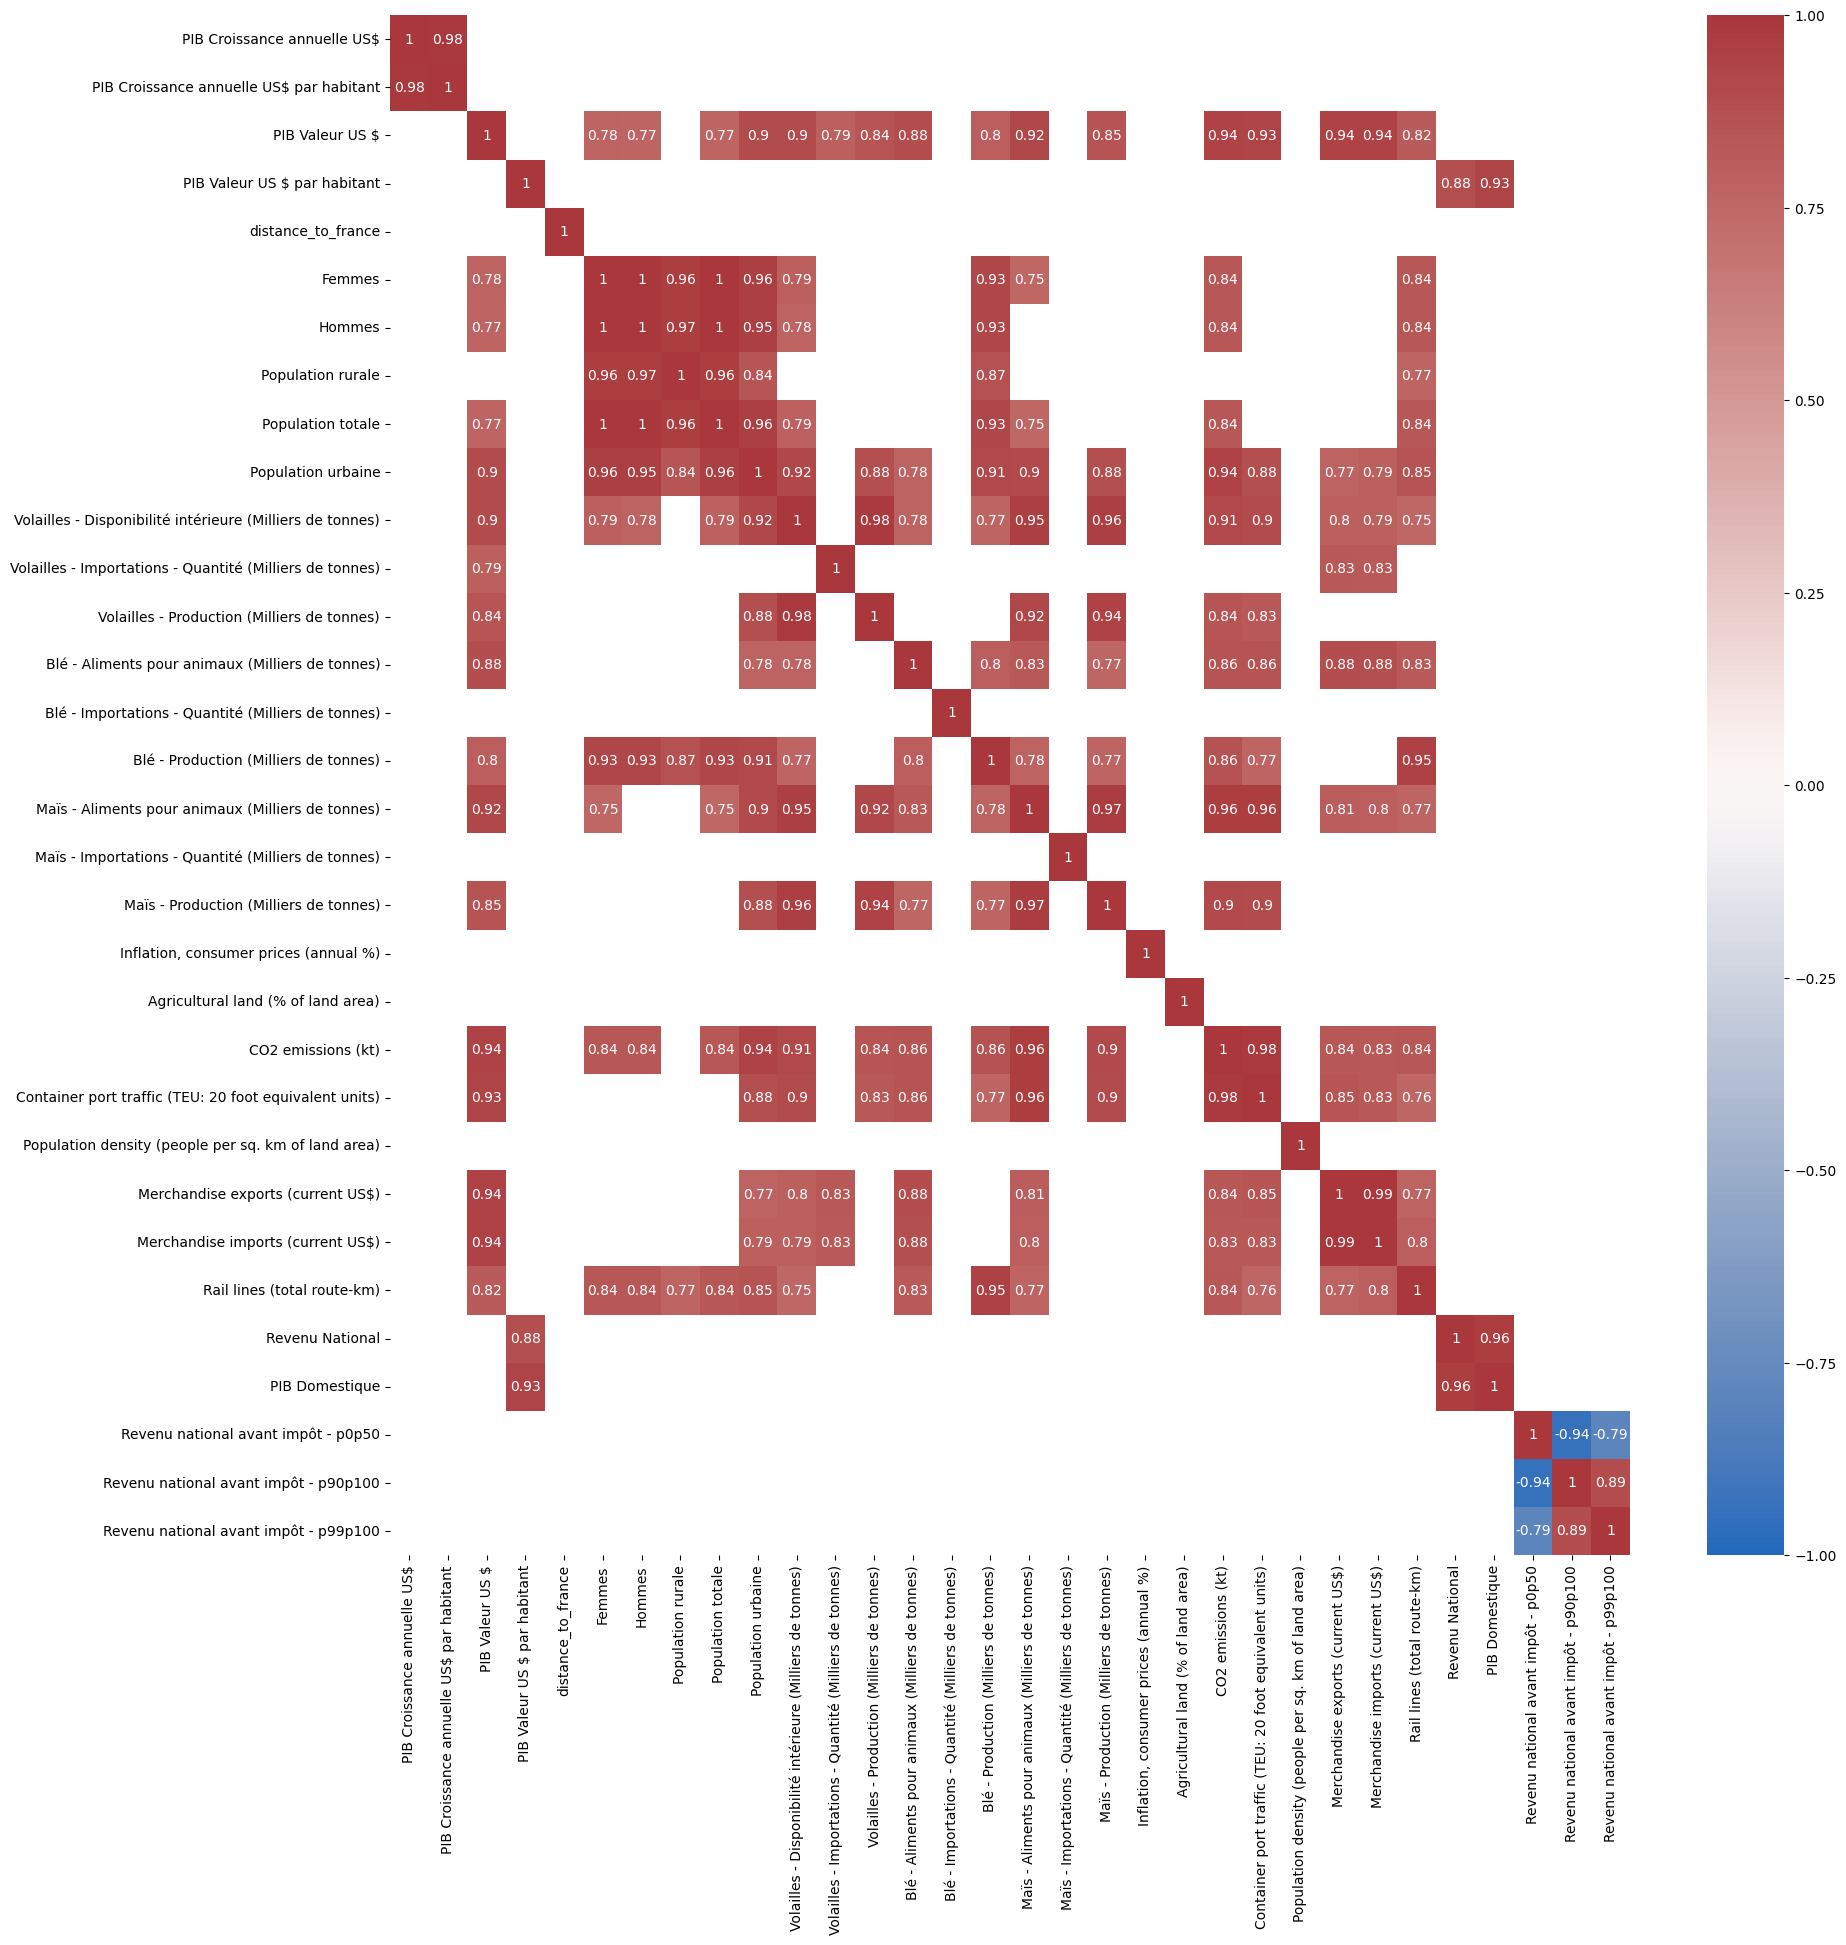

In [630]:
corr = df.corr()
mask = (corr > 0.75) | (corr < -0.75)
corr = corr[mask]
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap="vlag", vmin=-1, vmax=1, annot=True)

A partir de la matrice de corrélations, nous pouvons dès à présent sélectionner des variables pour notre étude.

In [631]:
col = [
    'CO2 emissions (kt)',
    'Container port traffic (TEU: 20 foot equivalent units)',
    'Merchandise exports (current US$)',
    'Merchandise imports (current US$)',
    'Rail lines (total route-km)',
    'PIB Valeur US $',
    'Volailles - Production (Milliers de tonnes)',
    'Blé - Aliments pour animaux (Milliers de tonnes)',
    'Maïs - Aliments pour animaux (Milliers de tonnes)',
    'Population urbaine',
]

<Axes: >

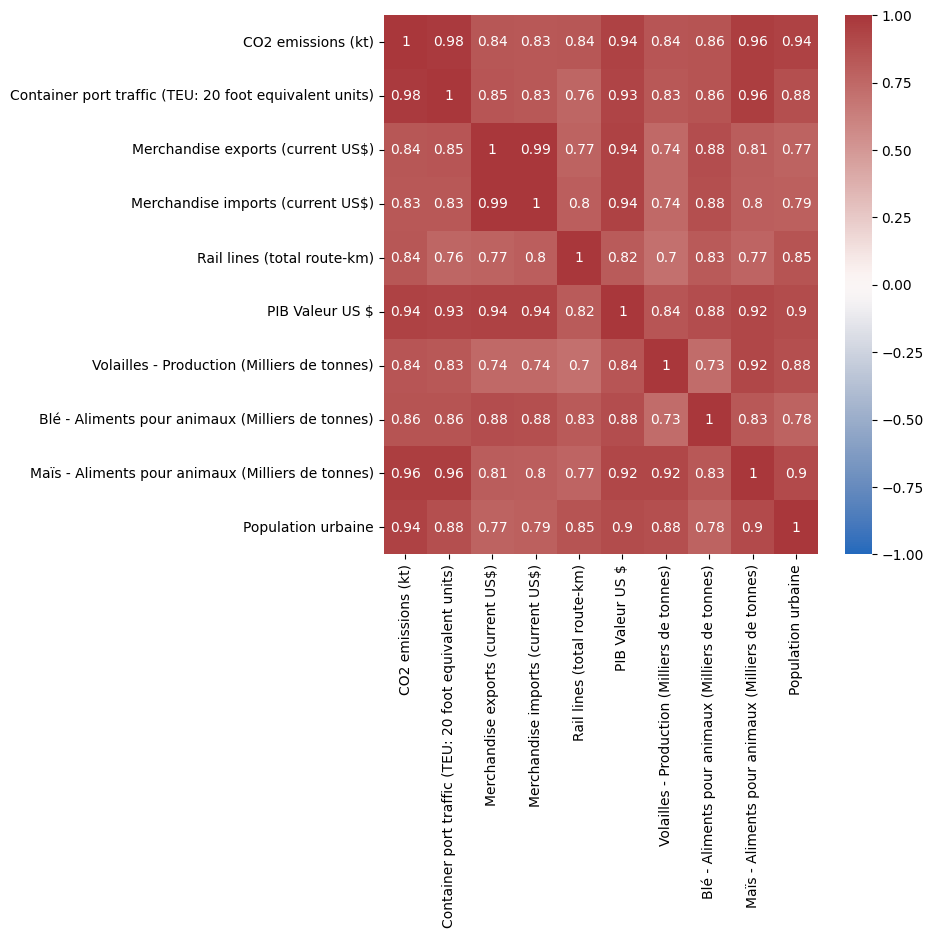

In [632]:
df_selected = df[col]
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df_selected.corr(), cmap="vlag", vmin=-1, vmax=1, annot=True)

In [633]:
df_selected.head()

,CO2 emissions (kt),Container port traffic (TEU: 20 foot equivalent units),Merchandise exports (current US$),Merchandise imports (current US$),Rail lines (total route-km),PIB Valeur US $,Volailles - Production (Milliers de tonnes),Blé - Aliments pour animaux (Milliers de tonnes),Maïs - Aliments pour animaux (Milliers de tonnes),Population urbaine
Zone,,,,,,,,,,
Afghanistan,11238.83,1229081.0,864000000,6777000000,2977.50,1.890449e+04,28.0,0.0,118.0,9582.625
Afrique du Sud,446626.00,4529034.0,90016000000,107539000000,20953.00,3.514310e+05,1816.0,23.0,5698.0,38820.239
Albanie,4993.30,145762.0,2716000000,5897000000,2977.50,1.540024e+04,13.0,29.0,420.0,1799.162
Algérie,170582.40,1793990.0,35312000000,44632000000,4020.25,1.711582e+05,285.0,712.0,3440.0,31236.431
Allemagne,658693.50,15029605.0,1489412000000,1233978000000,33423.00,3.888327e+06,1544.0,7100.0,5820.0,63787.507


## Analyse univariée

In [634]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected.values), index=df_selected.index, columns=df_selected.columns)

<Axes: >

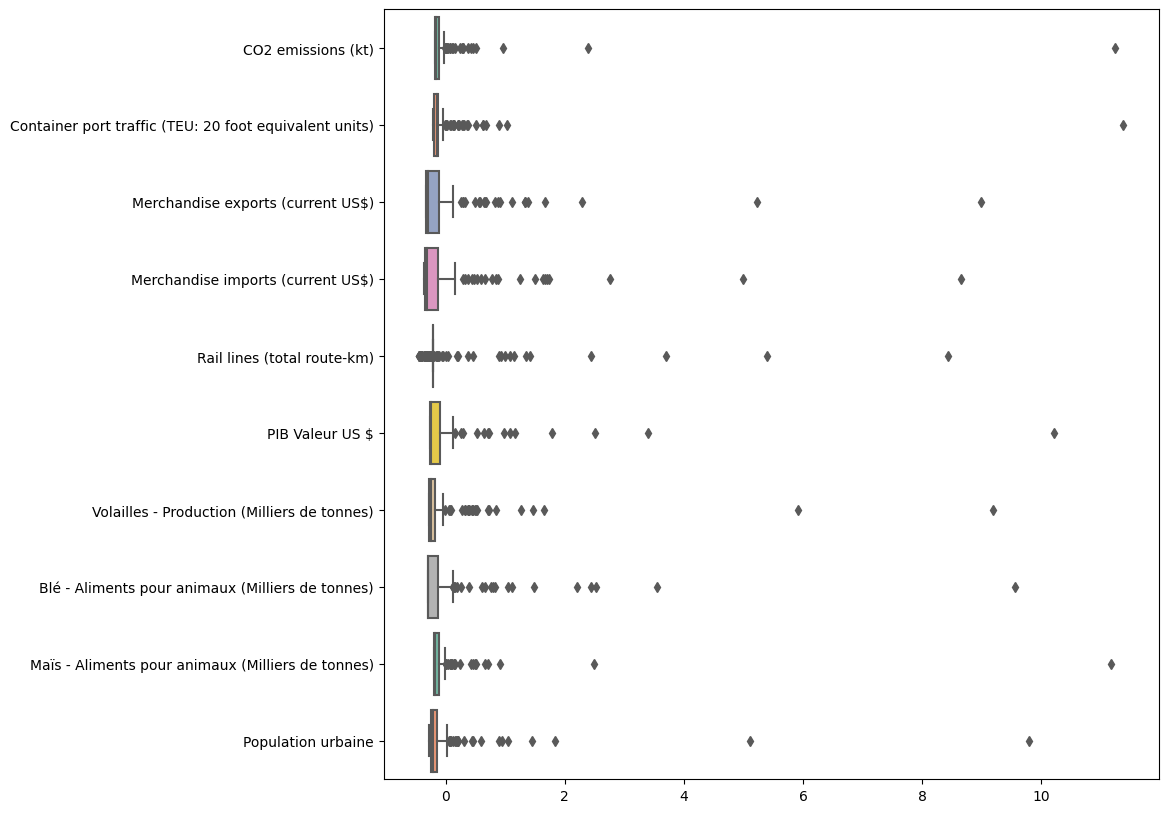

In [635]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df_scaled, orient="h", palette="Set2", ax=ax)

On enlève les outliers pour la suite de l'analyse avec la méthode des interquartiles

In [636]:
Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
df_selected_filtered = df_selected[((df_selected < (Q1 - threshold * IQR)) |(df_selected > (Q3 + threshold * IQR))).any(axis=1)]
df_selected_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, Afrique du Sud to Émirats arabes unis
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   CO2 emissions (kt)                                      70 non-null     float64
 1   Container port traffic (TEU: 20 foot equivalent units)  70 non-null     float64
 2   Merchandise exports (current US$)                       70 non-null     int64  
 3   Merchandise imports (current US$)                       70 non-null     int64  
 4   Rail lines (total route-km)                             70 non-null     float64
 5   PIB Valeur US $                                         70 non-null     float64
 6   Volailles - Production (Milliers de tonnes)             70 non-null     float64
 7   Blé - Aliments pour animaux (Milliers de tonnes)        70 non-null     float64
 8   Maïs - Aliments p

In [637]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, Afghanistan to Îles Salomon
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   CO2 emissions (kt)                                      137 non-null    float64
 1   Container port traffic (TEU: 20 foot equivalent units)  137 non-null    float64
 2   Merchandise exports (current US$)                       137 non-null    int64  
 3   Merchandise imports (current US$)                       137 non-null    int64  
 4   Rail lines (total route-km)                             137 non-null    float64
 5   PIB Valeur US $                                         137 non-null    float64
 6   Volailles - Production (Milliers de tonnes)             137 non-null    float64
 7   Blé - Aliments pour animaux (Milliers de tonnes)        137 non-null    float64
 8   Maïs - Aliments pour anima

In [638]:
df_selected_filtered.head()

,CO2 emissions (kt),Container port traffic (TEU: 20 foot equivalent units),Merchandise exports (current US$),Merchandise imports (current US$),Rail lines (total route-km),PIB Valeur US $,Volailles - Production (Milliers de tonnes),Blé - Aliments pour animaux (Milliers de tonnes),Maïs - Aliments pour animaux (Milliers de tonnes),Population urbaine
Zone,,,,,,,,,,
Afrique du Sud,446626.0,4529034.0,90016000000,107539000000,20953.00,3.514310e+05,1816.0,23.0,5698.0,38820.239
Algérie,170582.4,1793990.0,35312000000,44632000000,4020.25,1.711582e+05,285.0,712.0,3440.0,31236.431
Allemagne,658693.5,15029605.0,1489412000000,1233978000000,33423.00,3.888327e+06,1544.0,7100.0,5820.0,63787.507
Arabie saoudite,526770.3,8905621.0,261603000000,153163000000,2977.50,7.929668e+05,800.0,226.0,2285.0,28700.362
Argentine,168162.0,1833964.0,65116000000,49124000000,17866.00,4.454453e+05,2249.0,50.0,16000.0,41489.566


Text(0.5, 0.98, 'Data Distribution')

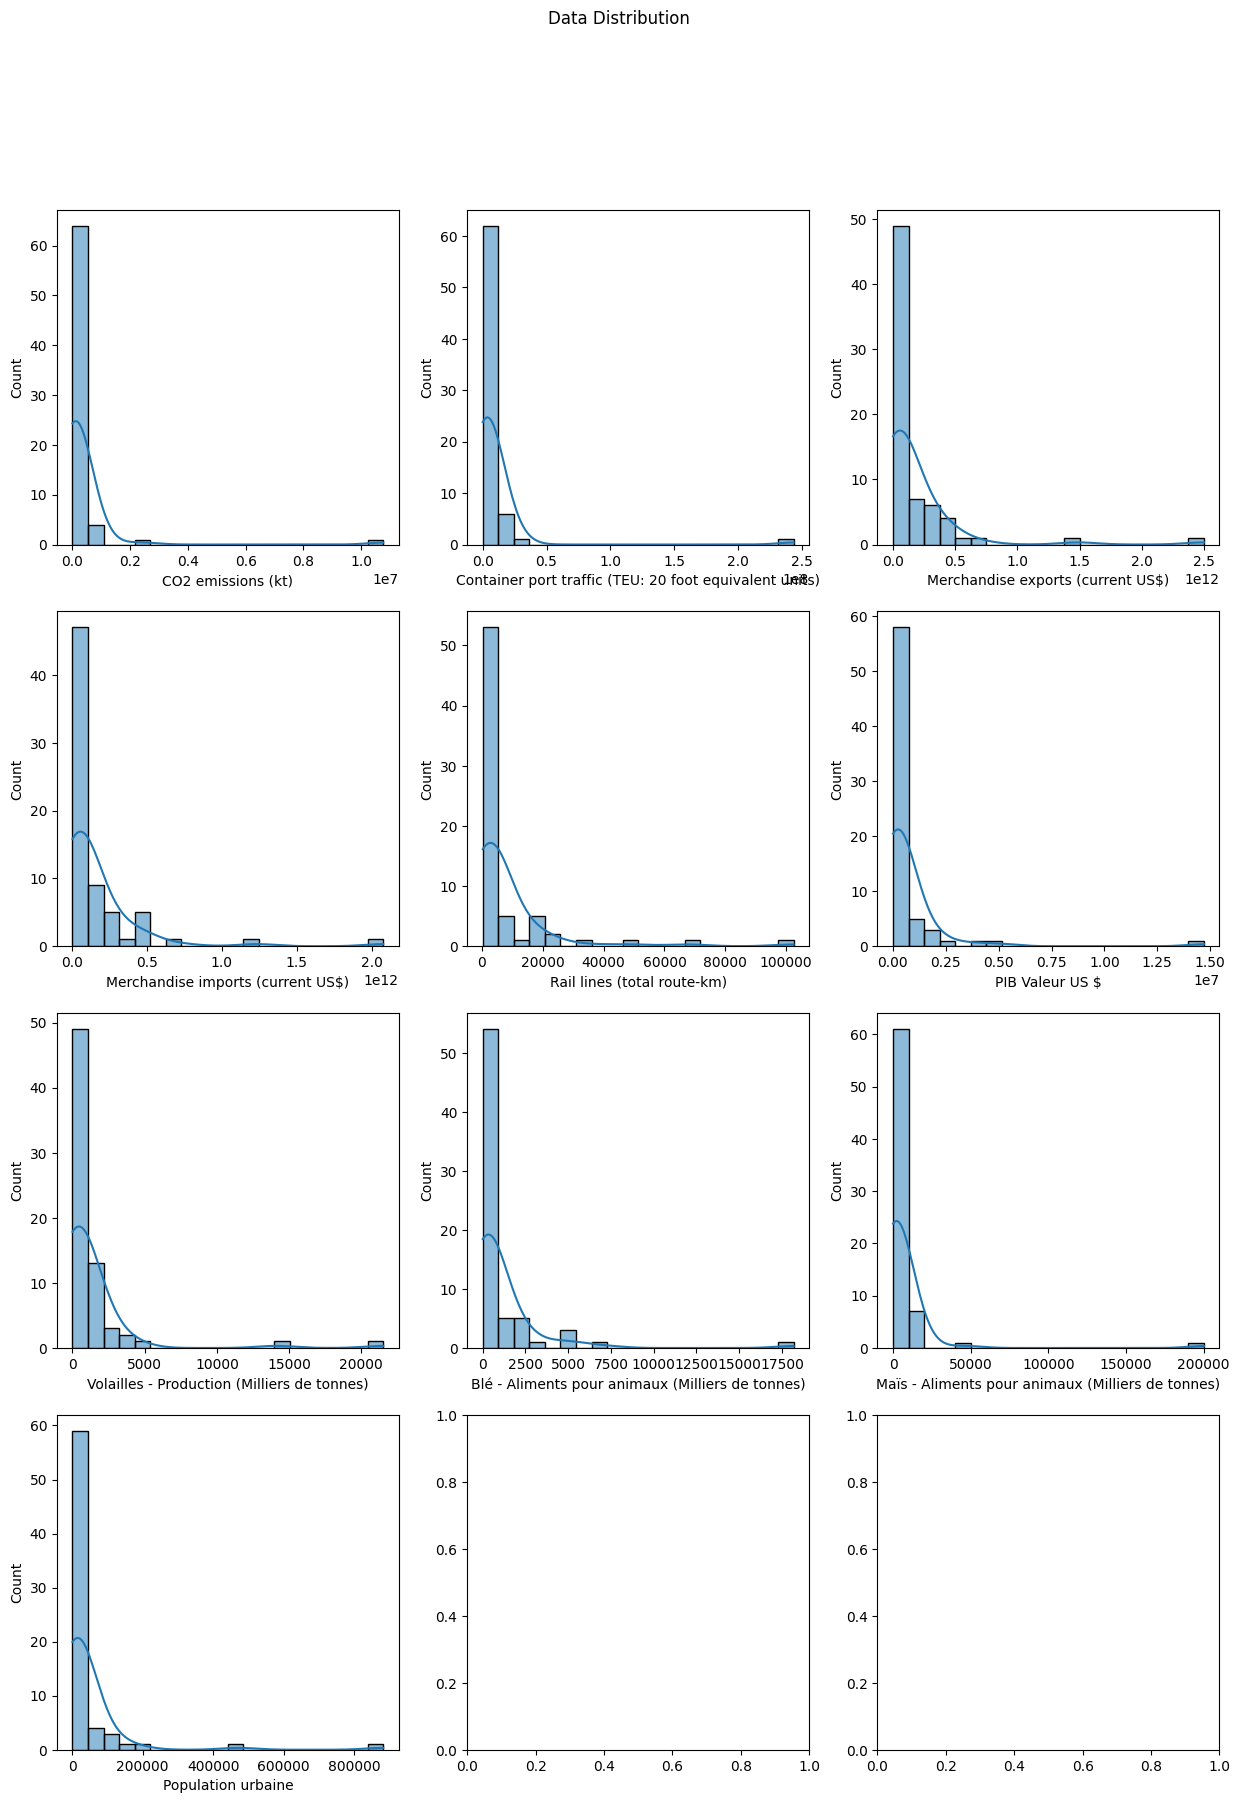

In [639]:
#Seaborn count histplot for each column
fig, ax = plt.subplots(4, 3, figsize=(15, 20))
sns.histplot(data=df_selected_filtered, x=col[0], kde=True, ax=ax[0,0], bins=20)
sns.histplot(data=df_selected_filtered, x=col[1], kde=True, ax=ax[0,1], bins=20)
sns.histplot(data=df_selected_filtered, x=col[2], kde=True, ax=ax[0,2], bins=20)
sns.histplot(data=df_selected_filtered, x=col[3], kde=True, ax=ax[1,0], bins=20)
sns.histplot(data=df_selected_filtered, x=col[4], kde=True, ax=ax[1,1], bins=20)
sns.histplot(data=df_selected_filtered, x=col[5], kde=True, ax=ax[1,2], bins=20)
sns.histplot(data=df_selected_filtered, x=col[6], kde=True, ax=ax[2,0], bins=20)
sns.histplot(data=df_selected_filtered, x=col[7], kde=True, ax=ax[2,1], bins=20)
sns.histplot(data=df_selected_filtered, x=col[8], kde=True, ax=ax[2,2], bins=20)
sns.histplot(data=df_selected_filtered, x=col[9], kde=True, ax=ax[3,0], bins=20)
# sns.histplot(data=df_selected_filtered, x=col[10], kde=True, ax=ax[3,1], bins=20)
# sns.histplot(data=df_selected_filtered, x=col[11], kde=True, ax=ax[3,2], bins=20)
# sns.histplot(data=df_selected_filtered, x=col[12], kde=True, ax=ax[4,0], bins=20)
# sns.histplot(data=df_selected_filtered, x=col[13], kde=True, ax=ax[4,1], bins=20)
# sns.histplot(data=df_selected_filtered, x=col[14], kde=True, ax=ax[4,2], bins=20)
fig.suptitle("Data Distribution", fontsize=12)

In [640]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [641]:
def shapiro_test(df,col):
    #shapiro test for each column
    print(color.BOLD + 'Shapiro test for each column' + color.END)
    print('-----------------------------')
    print('H0: the data is normally distributed')
    print('H1: the data is not normally distributed')
    print('α = 5%')
    print('-----------------------------')
    print()
    for feature in col:
        print(color.UNDERLINE + color.BLUE + feature + color.END)
        stat, p = stats.shapiro(df[feature])
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print(color.GREEN + 'Probably Gaussian' + color.END)
        else:
            print(color.RED + 'H0 rejected' + color.END)
        print()

In [642]:
shapiro_test(df_selected_filtered,col)

Shapiro test for each column
-----------------------------
H0: the data is normally distributed
H1: the data is not normally distributed
α = 5%
-----------------------------

CO2 emissions (kt)
Statistics=0.215, p=0.000
H0 rejected

Container port traffic (TEU: 20 foot equivalent units)
Statistics=0.216, p=0.000
H0 rejected

Merchandise exports (current US$)
Statistics=0.457, p=0.000
H0 rejected

Merchandise imports (current US$)
Statistics=0.500, p=0.000
H0 rejected

Rail lines (total route-km)
Statistics=0.454, p=0.000
H0 rejected

PIB Valeur US $
Statistics=0.352, p=0.000
H0 rejected

Volailles - Production (Milliers de tonnes)
Statistics=0.377, p=0.000
H0 rejected

Blé - Aliments pour animaux (Milliers de tonnes)
Statistics=0.433, p=0.000
H0 rejected

Maïs - Aliments pour animaux (Milliers de tonnes)
Statistics=0.231, p=0.000
H0 rejected

Population urbaine
Statistics=0.337, p=0.000
H0 rejected



Text(0.5, 0.98, 'Data Distribution')

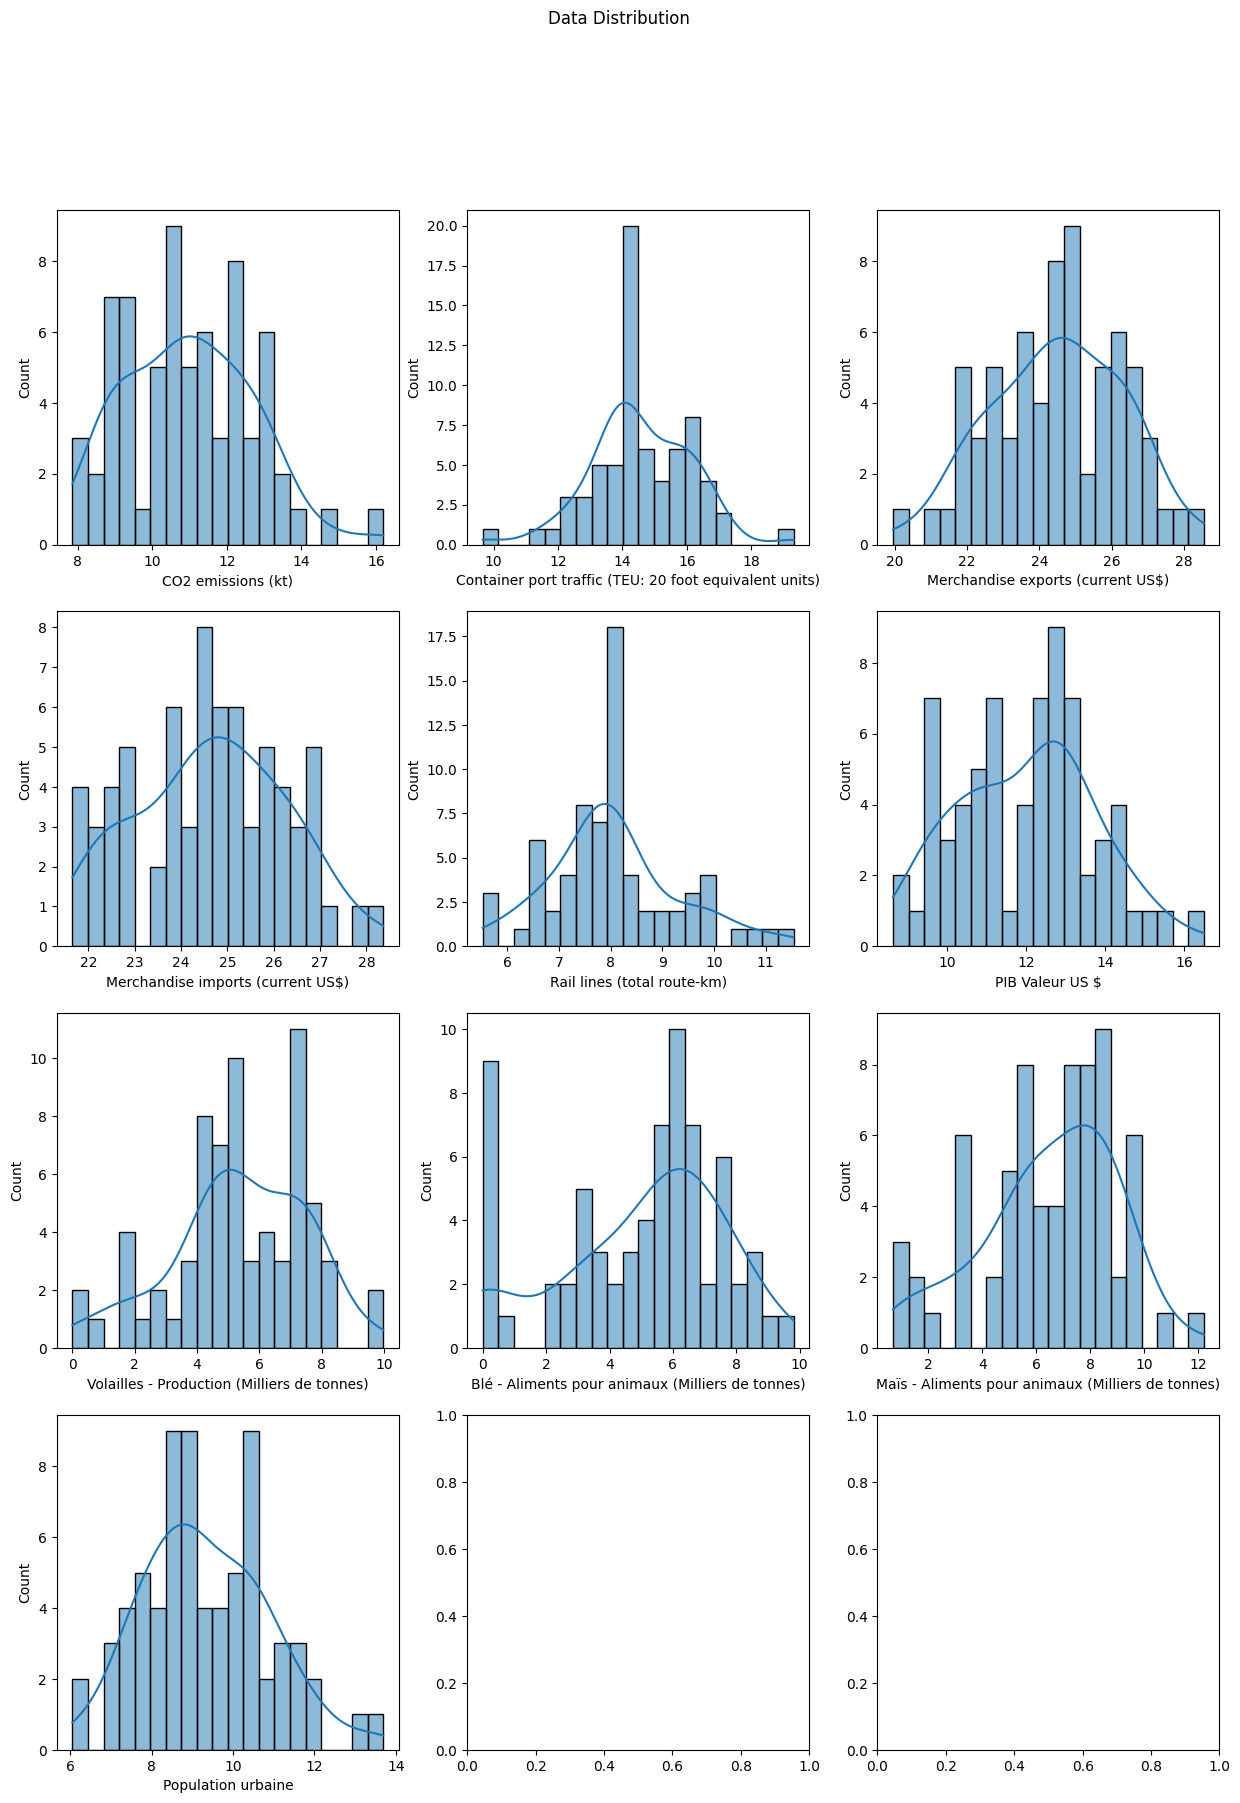

In [643]:
df_log = df_selected_filtered.applymap(lambda x: np.log(x+1))
#Seaborn count histplot for each column
fig, ax = plt.subplots(4, 3, figsize=(15, 20))
sns.histplot(data=df_log, x=col[0], kde=True, ax=ax[0,0], bins=20)
sns.histplot(data=df_log, x=col[1], kde=True, ax=ax[0,1], bins=20)
sns.histplot(data=df_log, x=col[2], kde=True, ax=ax[0,2], bins=20)
sns.histplot(data=df_log, x=col[3], kde=True, ax=ax[1,0], bins=20)
sns.histplot(data=df_log, x=col[4], kde=True, ax=ax[1,1], bins=20)
sns.histplot(data=df_log, x=col[5], kde=True, ax=ax[1,2], bins=20)
sns.histplot(data=df_log, x=col[6], kde=True, ax=ax[2,0], bins=20)
sns.histplot(data=df_log, x=col[7], kde=True, ax=ax[2,1], bins=20)
sns.histplot(data=df_log, x=col[8], kde=True, ax=ax[2,2], bins=20)
sns.histplot(data=df_log, x=col[9], kde=True, ax=ax[3,0], bins=20)
# sns.histplot(data=df_log, x=col[10], kde=True, ax=ax[3,1], bins=20)
# sns.histplot(data=df_log, x=col[11], kde=True, ax=ax[3,2], bins=20)
# sns.histplot(data=df_log, x=col[12], kde=True, ax=ax[4,0], bins=20)
# sns.histplot(data=df_log, x=col[13], kde=True, ax=ax[4,1], bins=20)
# sns.histplot(data=df_log, x=col[14], kde=True, ax=ax[4,2], bins=20)
fig.suptitle("Data Distribution", fontsize=12)

In [644]:
shapiro_test(df_log, col)

Shapiro test for each column
-----------------------------
H0: the data is normally distributed
H1: the data is not normally distributed
α = 5%
-----------------------------

CO2 emissions (kt)
Statistics=0.976, p=0.196
Probably Gaussian

Container port traffic (TEU: 20 foot equivalent units)
Statistics=0.973, p=0.127
Probably Gaussian

Merchandise exports (current US$)
Statistics=0.988, p=0.767
Probably Gaussian

Merchandise imports (current US$)
Statistics=0.981, p=0.350
Probably Gaussian

Rail lines (total route-km)
Statistics=0.956, p=0.016
H0 rejected

PIB Valeur US $
Statistics=0.982, p=0.399
Probably Gaussian

Volailles - Production (Milliers de tonnes)
Statistics=0.968, p=0.068
Probably Gaussian

Blé - Aliments pour animaux (Milliers de tonnes)
Statistics=0.926, p=0.000
H0 rejected

Maïs - Aliments pour animaux (Milliers de tonnes)
Statistics=0.966, p=0.056
Probably Gaussian

Population urbaine
Statistics=0.986, p=0.617
Probably Gaussian



# Feature Engineering

Nous allons ici créer deux variables : Une qui fera le ratio import/export, l'autre qui sommera la quantité de Blé et de Maïs dédié aux animaux. Nous étudierons l'impact de ces données dans une matrice de corrélation afin de savoir si celles-ci peuvent-être inclues dans notre analyse.

In [645]:
df_eng = df_selected_filtered.copy()

In [646]:
df_eng

,CO2 emissions (kt),Container port traffic (TEU: 20 foot equivalent units),Merchandise exports (current US$),Merchandise imports (current US$),Rail lines (total route-km),PIB Valeur US $,Volailles - Production (Milliers de tonnes),Blé - Aliments pour animaux (Milliers de tonnes),Maïs - Aliments pour animaux (Milliers de tonnes),Population urbaine
Zone,,,,,,,,,,
Afrique du Sud,446626.0,4529034.0,90016000000,107539000000,20953.00,3.514310e+05,1816.0,23.0,5698.0,38820.239
Algérie,170582.4,1793990.0,35312000000,44632000000,4020.25,1.711582e+05,285.0,712.0,3440.0,31236.431
Allemagne,658693.5,15029605.0,1489412000000,1233978000000,33423.00,3.888327e+06,1544.0,7100.0,5820.0,63787.507
Arabie saoudite,526770.3,8905621.0,261603000000,153163000000,2977.50,7.929668e+05,800.0,226.0,2285.0,28700.362
Argentine,168162.0,1833964.0,65116000000,49124000000,17866.00,4.454453e+05,2249.0,50.0,16000.0,41489.566
...,...,...,...,...,...,...,...,...,...,...
Ukraine,174599.9,1007273.0,50054000000,60800000000,21625.90,1.539296e+05,1390.0,2022.0,6018.0,30425.950
Uruguay,6806.7,749562.0,7680000000,8246000000,1498.00,6.123119e+04,72.0,48.0,712.0,3322.873
Zambie,7615.7,1229081.0,7039000000,7173000000,1248.00,2.330972e+04,51.0,0.0,284.0,7993.486


In [647]:
df_eng['Import/Export'] = df_eng['Merchandise imports (current US$)']/ df_eng['Merchandise exports (current US$)']
df_eng['Aliments Volailles (milliers de tonnes)'] = df_eng['Blé - Aliments pour animaux (Milliers de tonnes)'] + df_eng['Maïs - Aliments pour animaux (Milliers de tonnes)']

<Axes: >

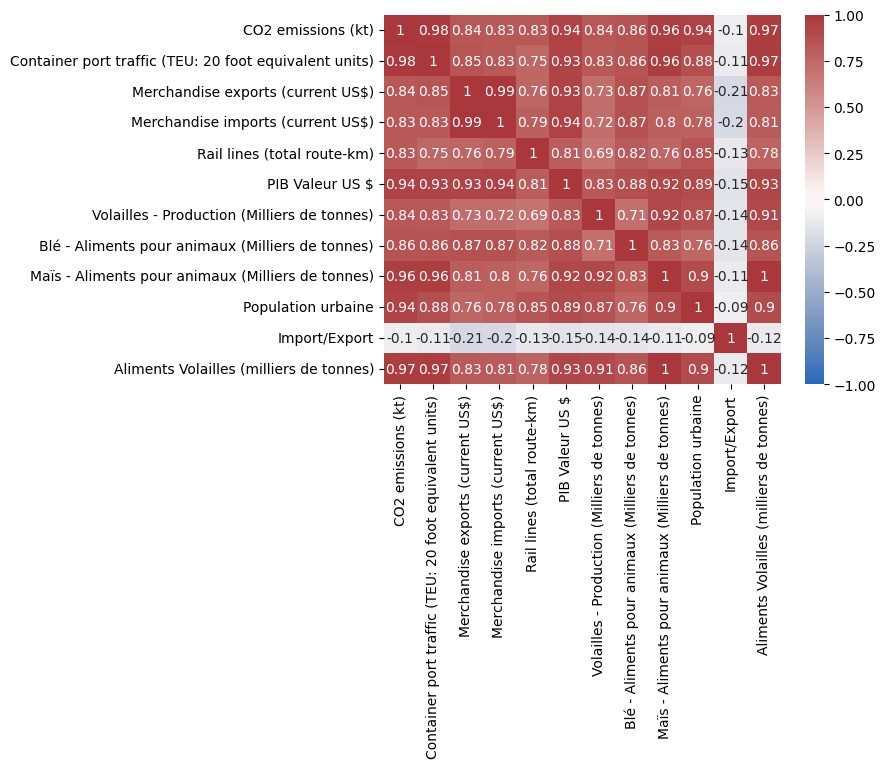

In [648]:
sns.heatmap(df_eng.corr(), cmap="vlag", vmin=-1, vmax=1, annot=True)

Cette variable n'apportera rien à notre étude. La somme Blé/Maïs, elle, est très corrélée aux autres variables. Nous allons supprimer les deux variable Blé et Mais et nous garderons la somme

<Axes: >

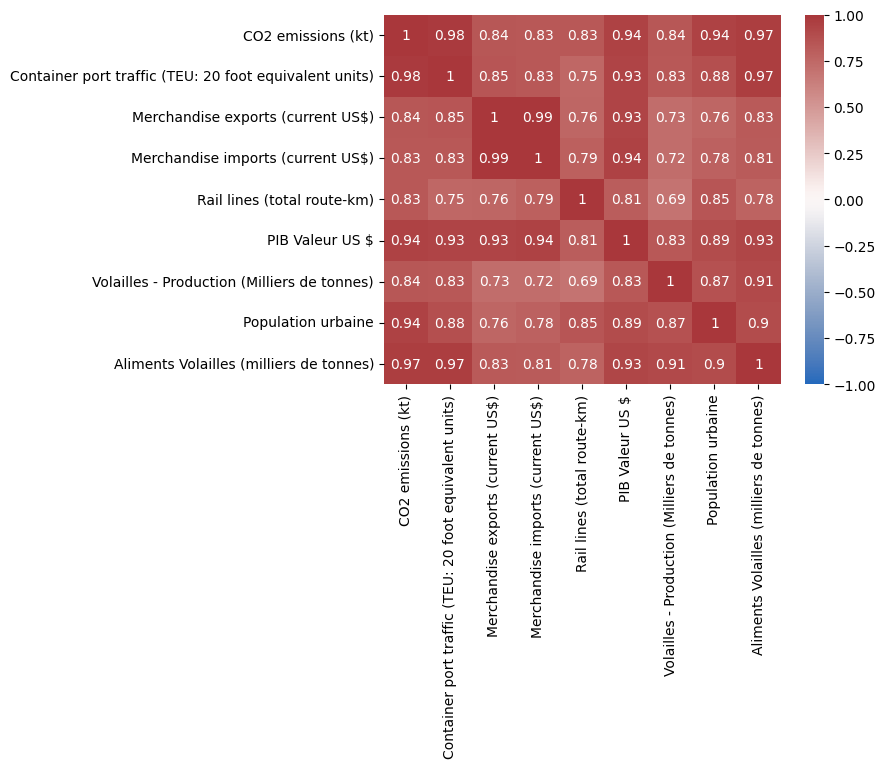

In [649]:
df_eng = df_eng.drop(columns=['Import/Export', 'Blé - Aliments pour animaux (Milliers de tonnes)', 'Maïs - Aliments pour animaux (Milliers de tonnes)'])
sns.heatmap(df_eng.corr(), cmap="vlag", vmin=-1, vmax=1, annot=True)

In [650]:
df_eng

,CO2 emissions (kt),Container port traffic (TEU: 20 foot equivalent units),Merchandise exports (current US$),Merchandise imports (current US$),Rail lines (total route-km),PIB Valeur US $,Volailles - Production (Milliers de tonnes),Population urbaine,Aliments Volailles (milliers de tonnes)
Zone,,,,,,,,,
Afrique du Sud,446626.0,4529034.0,90016000000,107539000000,20953.00,3.514310e+05,1816.0,38820.239,5721.0
Algérie,170582.4,1793990.0,35312000000,44632000000,4020.25,1.711582e+05,285.0,31236.431,4152.0
Allemagne,658693.5,15029605.0,1489412000000,1233978000000,33423.00,3.888327e+06,1544.0,63787.507,12920.0
Arabie saoudite,526770.3,8905621.0,261603000000,153163000000,2977.50,7.929668e+05,800.0,28700.362,2511.0
Argentine,168162.0,1833964.0,65116000000,49124000000,17866.00,4.454453e+05,2249.0,41489.566,16050.0
...,...,...,...,...,...,...,...,...,...
Ukraine,174599.9,1007273.0,50054000000,60800000000,21625.90,1.539296e+05,1390.0,30425.950,8040.0
Uruguay,6806.7,749562.0,7680000000,8246000000,1498.00,6.123119e+04,72.0,3322.873,760.0
Zambie,7615.7,1229081.0,7039000000,7173000000,1248.00,2.330972e+04,51.0,7993.486,284.0


In [651]:
df_region.index = df_region['Zone']
df_eng = pd.merge(df_eng, df_region, left_index=True, right_index=True)
df_eng = df_eng.drop(columns=['Zone'])
df_eng

,CO2 emissions (kt),Container port traffic (TEU: 20 foot equivalent units),Merchandise exports (current US$),Merchandise imports (current US$),Rail lines (total route-km),PIB Valeur US $,Volailles - Production (Milliers de tonnes),Population urbaine,Aliments Volailles (milliers de tonnes),region
Zone,,,,,,,,,,
Afrique du Sud,446626.0,4529034.0,90016000000,107539000000,20953.00,3.514310e+05,1816.0,38820.239,5721.0,Africa
Algérie,170582.4,1793990.0,35312000000,44632000000,4020.25,1.711582e+05,285.0,31236.431,4152.0,Africa
Allemagne,658693.5,15029605.0,1489412000000,1233978000000,33423.00,3.888327e+06,1544.0,63787.507,12920.0,Europe
Arabie saoudite,526770.3,8905621.0,261603000000,153163000000,2977.50,7.929668e+05,800.0,28700.362,2511.0,Asia
Argentine,168162.0,1833964.0,65116000000,49124000000,17866.00,4.454453e+05,2249.0,41489.566,16050.0,Americas
...,...,...,...,...,...,...,...,...,...,...
Ukraine,174599.9,1007273.0,50054000000,60800000000,21625.90,1.539296e+05,1390.0,30425.950,8040.0,Europe
Uruguay,6806.7,749562.0,7680000000,8246000000,1498.00,6.123119e+04,72.0,3322.873,760.0,Americas
Zambie,7615.7,1229081.0,7039000000,7173000000,1248.00,2.330972e+04,51.0,7993.486,284.0,Africa


In [652]:
df_eng.to_csv('analysis.csv', index=True)